<a href="https://colab.research.google.com/github/AJAK404/EIGSEP-Flagger/blob/main/PracticeMakesPerfect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Imports*

In [1]:
import numpy as np
import pandas as pd
import csv
import h5py
import matplotlib.pyplot as plt
import sys
import zipfile
import os

##**Sample Data**

In [ ]:
cdata = pd.read_csv("/content/test_data.csv", header = None) # Get data from CSV
cdata = cdata.transpose() # Transpose; get rows to columns.
cdata

0          1
0       0.000000  5982929.5
1       0.244141        6.0
2       0.488281        4.0
3       0.732422        3.5
4       0.976562        3.0
...          ...        ...
1019  248.779297    64403.5
1020  249.023438    63897.0
1021  249.267578    63412.0
1022  249.511719    53826.0
1023  249.755859    57717.5

[1024 rows x 2 columns]

[]

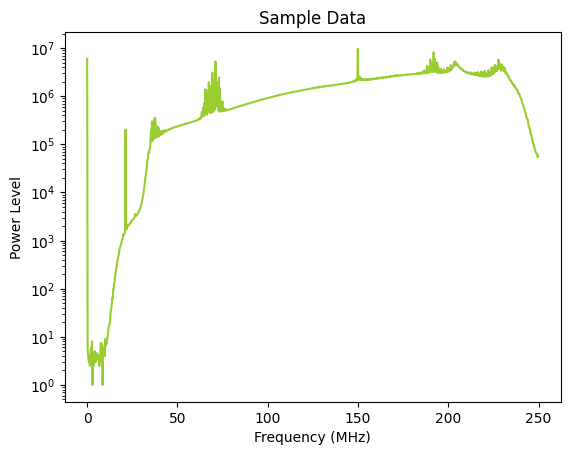

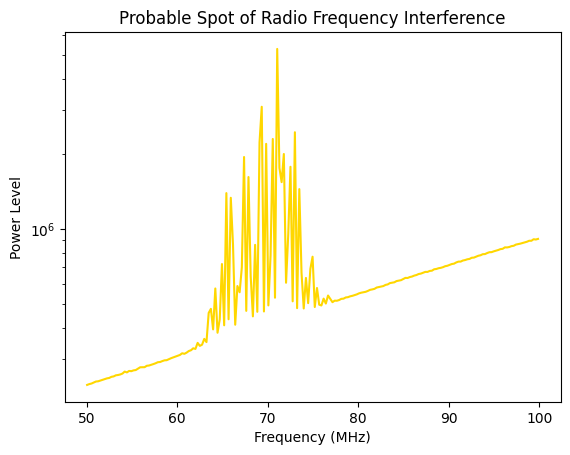

In [ ]:
data = np.array(cdata).astype("float64") # Get to the reliable and trustworthy numpy array.
sdata = np.array([[1, 2, 3], [2, 4, 6]])
sample = plt.figure()
graph = sample.add_subplot()
graph.plot(data[:, 0], data[:, 1], color = "yellowgreen") # This and gold are the prettiest colors.
graph.set_yscale("log")
plt.xlabel("Frequency (MHz)") # MHz, presumably.
plt.ylabel("Power Level") # What unit is this in?
plt.title("Sample Data")

FMData = []
for point in data:
  if point[0] >= 50 and point[0] < 100.0:
    FMData.append(point)
FMData = np.array(FMData)

RFI = plt.figure()
F = RFI.add_subplot()
F.plot(FMData[:, 0], FMData[:, 1], color = "gold") # This and yellowgreen are the prettiest colors.
F.set_yscale("log")
plt.xlabel("Frequency (MHz)") # MHz, presumably.
plt.ylabel("Power Level") # What unit is this in?
plt.title("Probable Spot of Radio Frequency Interference")
plt.plot()

##**Real Data** (The Wasteland of Bad Code)

*Import Github Repositories*

In [2]:
repo = "eigsep_observing"
!git -C $repo pull origin || git clone https://github.com/EIGSEP/eigsep_observing $repo
!pip install ./eigsep_observing
repo = "eigsep_corr"
!git -C $repo pull origin || git clone https://github.com/EIGSEP/eigsep_corr $repo
!pip install ./eigsep_corr
repo = "CMT-VNA"
!git -C $repo pull origin || git clone https://github.com/EIGSEP/CMT-VNA $repo
!pip install ./CMT-VNA
!pip install redis

fatal: cannot change to 'eigsep_observing': No such file or directory
Cloning into 'eigsep_observing'...
remote: Enumerating objects: 2199, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 2199 (delta 8), reused 11 (delta 7), pack-reused 2176 (from 1)
Receiving objects: 100% (2199/2199), 394.86 KiB | 12.34 MiB/s, done.
Resolving deltas: 100% (1388/1388), done.
Processing ./eigsep_observing
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/EIGSEP/CMT-VNA.git (to revision main) to /tmp/pip-install-be0r7j9l/cmt-vna_71a6feee7c9f4e33891829bcac38c79c
  Running command git clone --filter=blob:none --quiet https://github.com/EIGSEP/CMT-VNA.git /tmp/pip-install-be0r7j9l/cmt-vna_71a6feee7c9f4e33891829bcac38c79c
  Resolved https://github.com/EIGSEP/CMT-VNA.git to commit c0b3470a577659e03293f068809b56be6090bdb2
  Install

In [3]:
# %cd eigsep_observing
# %cd eigsep_corr
# sys.path.append("/content/eigsep_observing")
# sys.path.append("/content/eigsep_corr")
# sys.path.append("/content/cmt_vna")
import eigsep_observing as eo

###**Unzip and Load Files**

In [4]:
with zipfile.ZipFile("/content/july2025_S11-20251002T042711Z-1-001.zip", "r") as da:
  da.extractall()

In [ ]:
data, cal, head, meta = eo.io.read_s11_file("/content/july2025_S11/ants11_20250719_110732.h5")

In [ ]:
cdata = pd.DataFrame(data)
#cdata = pd.DataFrame(cal)
#cdata = pd.DataFrame(head)
#cdata = pd.DataFrame(meta)
cdata # "C" the data in an easily readable format.

ant                load               noise
0    0.730929+0.147374j  0.017836+0.001196j  0.013258+0.001565j
1    0.742486+0.087029j  0.018138+0.001233j  0.013556+0.001704j
2    0.752008+0.038850j  0.018419+0.001224j  0.013861+0.001807j
3    0.760031-0.004052j  0.018676+0.001190j  0.014154+0.001881j
4    0.766125-0.044378j  0.018890+0.001128j  0.014405+0.001949j
..                  ...                 ...                 ...
995 -0.043957+0.204333j  0.003950+0.012488j  0.005180+0.008416j
996 -0.038342+0.205324j  0.004016+0.012487j  0.005146+0.008409j
997 -0.032653+0.206086j  0.004091+0.012480j  0.005117+0.008372j
998 -0.026947+0.206648j  0.004153+0.012464j  0.005090+0.008325j
999 -0.021294+0.206956j  0.004226+0.012459j  0.005065+0.008301j

[1000 rows x 3 columns]

###**Visualize**

In [ ]:
def xsorter(name): # Do NOT use!
  vnal = np.hstack((cal[name].reshape(-1, 1), data["rec"].reshape(-1, 1)))
  vnal = vnal[vnal[:, 0].argsort()]
  return vnal

0                   1
0   -0.002524+0.003180j  0.841011+0.437226j
1   -0.002513+0.002202j  0.788697+0.529764j
2   -0.002425+0.004527j  0.921944+0.234110j
3   -0.002405+0.000514j  0.698206+0.642072j
4   -0.002391+0.001714j  0.681938+0.661997j
..                  ...                 ...
995  0.014618-0.002605j -0.448374-0.865341j
996  0.014654+0.000003j -0.153143-0.968998j
997  0.014666-0.000792j -0.287062-0.937700j
998  0.014672-0.000119j -0.089420-0.980090j
999  0.014717-0.001344j -0.321837-0.923338j

[1000 rows x 2 columns]

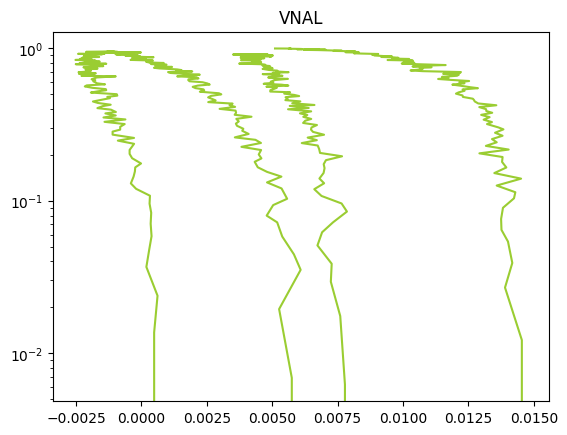

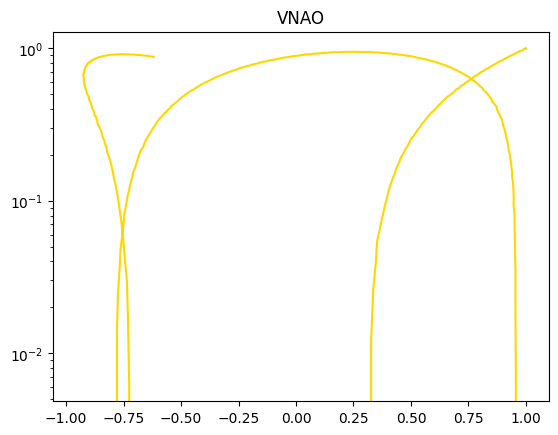

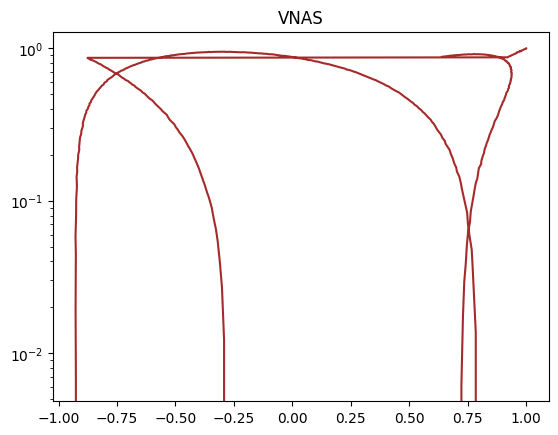

In [ ]:
check = plt.figure()
vnalg = check.add_subplot()
vnalg.plot(cal["VNAL"], data["rec"], color = "yellowgreen")
#plt.imshow([cal["VNAL"], data["rec"]], cmap='hot', interpolation='nearest')
vnalg.set_yscale("log")
plt.title("VNAL")
plt.show()
check = plt.figure()
vnaog = check.add_subplot()
vnaog.plot(cal["VNAO"], data["rec"], color = "gold")
vnaog.set_yscale("log")
plt.title("VNAO")
plt.show()
check = plt.figure()
vnasg = check.add_subplot()
vnasg.plot(cal["VNAS"], data["rec"], color = "brown")
vnasg.set_yscale("log")
plt.title("VNAS")
plt.show()

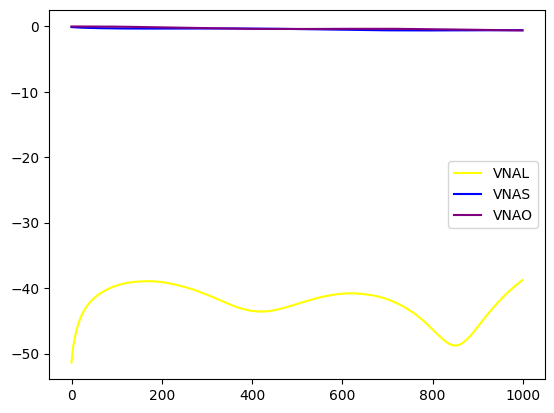

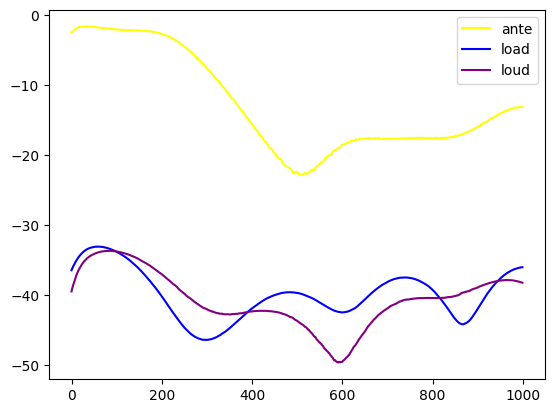

In [ ]:
vdata, vcal, vhead, vmeta = eo.io.read_s11_file("/content/july2025_S11/ants11_20250719_110732.h5")
def lin(x):
  return 20* np.log10(np.abs(x))
plt.figure()
plt.plot(lin(vcal["VNAL"]), color = "yellow",label = "VNAL")
plt.plot(lin(vcal["VNAS"]), color = "blue", label = "VNAS")
plt.plot(lin(vcal["VNAO"]), color = "purple", label = "VNAO")
#plt.plot(lin(data["rec"]), color = "yellow", label = "Data")
plt.legend()
plt.show()
plt.plot(lin(vdata["ant"]), color = "yellow",label = "ante")
plt.plot(lin(vdata["load"]), color = "blue", label = "load")
plt.plot(lin(vdata["noise"]), color = "purple", label = "loud")
plt.legend()
plt.show()

###**Evaluate**

In [23]:
def isgood(fname): # Outdated proof of concept for isnormal(); use at your own risk.
  good = True
  data, cal, head, meta = eo.io.read_s11_file(fname)
  vnao = np.mean(20 * np.log10(np.abs(cal["VNAO"])))
  vnas = np.mean(20* np.log10(np.abs(cal["VNAS"])))
  vnal = np.mean(20* np.log10(np.abs(cal["VNAL"])))
  rec = np.mean(20* np.log10(np.abs(data["rec"])))
  if -5 > vnao:
    print("Mean VNAO " + str(vnao) + " is below -5!")
    good = False
  elif 0 < vnao:
    print("Mean VNAO " + str(vnao) + " is above zero!")
    good = False
  if -5 > vnas:
    print("Mean VNAS " + str(vnas) + " is below -5!")
    good = False
  elif 0 < vnas:
    print("Mean VNAS " + str(vnas) + " is above zero!")
    good = False
  if -50 > vnal:
    print("Mean VNAL " + str(vnal) + " is below -50!")
    good = False
  elif -30 < vnal:
    print("Mean VNAL " + str(vnal) + " is above -30!")
    good = False
  if -30 > rec:
    print("Mean data " + str(data) + " is below -30!")
    good = False
  elif -5 < rec:
    print("Mean data " + str(data) + " is above -5!")
    good = False
  return good

def isfoldernormal(s11folder, lowo = -5, higho = 0,lows = -5, highs = 0,
             highl = -30, highd = -5, highr = -5, higha = -5, highal = -30,
             highn = -30,
             complain = True, displayAno = False, displayAll = False):
  # -- Documentation--
  # Required Inputs: A folder containing only s11 files; if you have other stuff in there, should remove it first.
  # Optional Inputs: The upper and lower bounds of each input.
  #                  The option of a written summary of anomalies; defaults to true.
  #                  The option to see the plotted graphs of either the anomalous values or all values of
  #                  anomalous graphs.
  # Outputs: A boolean value denoting normality; if true, the entire folder is normal.
  #          A dictionary of anomalies, structured as such:
  #          {"path + filename": [[Written list of anomalies], [Key to the anomalous data]]}
  #          Example: {"/C:/S11F/f.h5": [["Mean VNAO is above -5.", "Mean VNAS is above -5."], ["VNAO", "VNAS"]]}
  if displayAll or displayAno: # A reminder about The Annoying TM.
    print("Depending on your terminal, you may need to open XQuartz or a similar platform to see graphs. Sorry!")
  complaints = {}
  normal = True
  # Go through the folder and evaluate each file.
  for path, folders, files in os.walk(s11folder):
    for fname in files: # Get each file.
      whining = []
      yapping = []
      good = True
      data, cal, head, meta = eo.io.read_s11_file(path + "/" + fname)
      # First, check the calibration.
      vnao = np.mean(20 * np.log10(np.abs(cal["VNAO"])))
      vnas = np.mean(20* np.log10(np.abs(cal["VNAS"])))
      vnal = np.mean(20* np.log10(np.abs(cal["VNAL"])))
      if lowo > vnao:
        whining.append("Mean VNAO " + str(vnao) + " is below " + str(lowo) + ".")
        yapping.append("VNAO")
        good = False
      elif higho < vnao:
        whining.append("Mean VNAO " + str(vnao) + " is above " + str(higho) + ".")
        yapping.append("VNAO")
        good = False
      if lows > vnas:
        whining.append("Mean VNAS " + str(vnas) + " is below " + str(lows) + ".")
        yapping.append("VNAS")
        good = False
      elif highs < vnas:
        whining.append("Mean VNAS " + str(vnas) + " is above " + str(highs) + ".")
        yapping.append("VNAS")
        good = False
      if highl < vnal:
        whining.append("Mean VNAL " + str(vnal) + " is above " + str(highl) + ".")
        yapping.append("VNAL")
        good = False
      # Second, check the data.
      if len(data) == 1:
        rec = np.mean(20* np.log10(np.abs(data["rec"])))
        if highr < rec:
          whining.append("Mean data " + str(rec) + " is above " + str(highr) + ".")
          yapping.append("rec")
          good = False
      else:
        ante = np.mean(20* np.log10(np.abs(data["ant"])))
        load = np.mean(20* np.log10(np.abs(data["load"])))
        loud = np.mean(20* np.log10(np.abs(data["noise"])))
        if higha < ante:
          whining.append("Mean antenna data " + str(ante) + " is above " + str(higha) + ".")
          yapping.append("ant")
          good = False
        if highal < load:
          whining.append("Mean load data " + str(load) + " is above " + str(highal) + ".")
          yapping.append("load")
          good = False
        if highn < loud:
          whining.append("Mean noise " + str(loud) + " is above " + str(highn) + ".")
          yapping.append("noise")
          good = False
      # Finally, summarize the complaints.
      if not good:
        fpath = path + "/" + fname
        complaints.update({fpath : [whining, yapping]})
        normal = False
  # Take all the complaints and display them appropriately.
  if not normal:
    if complain or displayAll or displayAno:
      print("The following is a complete list of abnormal files and their anomalies in this folder.")
    for fiel in complaints:
      if complain:
        print("  +  " + fiel)
        for whine in complaints[fiel][0]:
          print("    -  " + whine)
      if displayAno or displayAll:
        colors = {"VNAO": "red", "VNAS": "orange", "VNAL": "yellow",
                "ant": "green", "load": "blue", "noise": "purple",
                "rec": "gray"} # Yes, it IS completely necessay to have a different color for each one!
        data, cal, head, meta = eo.io.read_s11_file(fiel)
        plt.figure()
        if displayAno and not displayAll: # If only the anomalies are wanted, just pull from the complaints.
          for yap in complaints[fiel][1]:
            if yap[:3] == "VNA":
              plt.plot(lin(cal[yap]), color = colors[yap],label = yap)
            else:
              plt.plot(lin(data[yap]), color = colors[yap],label = yap)
        if displayAll: # Otherwise, display all of the lines.
          for yap in colors:
            if yap[:3] == "VNA":
              plt.plot(lin(cal[yap]), color = colors[yap],label = yap)
            else:
              if len(data) == 1 and yap == "rec":
                plt.plot(lin(data[yap]), color = colors[yap],label = yap)
              elif len(data) == 3 and yap != "rec":
                plt.plot(lin(data[yap]), color = colors[yap],label = yap)
        titl = fiel
        if displayAno:
          titl = fiel + " Anomalies"
        plt.title(titl)
        plt.legend()
        plt.show()
  if normal and complain:
    print("Nothing abnormal here!")
    # This will probably never occur unless there is very little in the folder or the code is broken.
  return normal, complaints

#def flagfiles(list = True, editfile = False) # Make a list of files and normality, or change metadata of files to include noramalacy.

def activeflag(data, cal, lowo = -5, higho = 0,lows = -5, highs = 0, highl = -30,
               highd = -5, highr = -5, higha = -5, highal = -30, highn = -30):
  # Checks normalacy as data is recorded after required amount of data; is either whole or scrolling.
  flags = {}
  vnao = np.mean(20 * np.log10(np.abs(cal["VNAO"])))
  vnas = np.mean(20* np.log10(np.abs(cal["VNAS"])))
  vnal = np.mean(20* np.log10(np.abs(cal["VNAL"])))
  good = True
  if lowo > vnao:
      good = False
  elif higho < vnao:
      good = False
  if lows > vnas:
      good = False
  elif highs < vnas:
      good = False
  if highl < vnal:
      good = False
  flags.update({"cal": good})
  if len(data) == 1:
    rec = np.mean(20* np.log10(np.abs(data["rec"])))
    rnorm = bool(highr > rec)
    flags.update({"rec": rnorm})
  else:
    ante = np.mean(20* np.log10(np.abs(data["ant"])))
    load = np.mean(20* np.log10(np.abs(data["load"])))
    loud = np.mean(20* np.log10(np.abs(data["noise"])))
    anorm = bool(higha > ante)
    alnorm = bool(highal > load)
    nnorm = bool(highn > loud)
    flags.update({"ant": anorm, "load": alnorm, "noise": nnorm})
  return flags

def listanomalies(anomalies): # Takes complaints and lists them.
  if anomalies == {}:
    print("Nothing abnormal here!")
  for fiel in anomalies:
    print("  +  " + fiel)
    for whine in anomalies[fiel][0]:
      print("    -  " + whine)

def displayAnomalies(anomalies, justAnomalies = False): # Takes anomalies and graphs them.
  colors = {"VNAO": "red", "VNAS": "orange", "VNAL": "yellow",
            "ant": "green", "load": "blue", "noise": "purple",
            "rec": "gray"} # Yes, it IS completely necessay to have a different color for each one!
  for fiel in anomalies:
    data, cal, head, meta = eo.io.read_s11_file(fiel)
    plt.figure()
    if justAnomalies: # If only the anomalies are wanted, just pull from the complaints.
      for yap in anomalies[fiel][1]:
        if yap[:3] == "VNA":
          plt.plot(lin(cal[yap]), color = colors[yap],label = yap)
        else:
          plt.plot(lin(data[yap]), color = colors[yap],label = yap)
    else: # Otherwise, display all of the lines.
      for yap in colors:
        if yap[:3] == "VNA":
          plt.plot(lin(cal[yap]), color = colors[yap],label = yap)
        else:
          if len(data) == 1 and yap == "rec":
            plt.plot(lin(data[yap]), color = colors[yap],label = yap)
          elif len(data) == 3 and yap != "rec":
            plt.plot(lin(data[yap]), color = colors[yap],label = yap)
    titl = fiel
    if justAnomalies:
      titl = fiel + " Anomalies"
    plt.title(titl)
    plt.legend()
    plt.show()

def displayNormal(s11folder, anomalies): # Takes normal data and graphs it.
  colors = {"VNAO": "red", "VNAS": "orange", "VNAL": "yellow",
            "ant": "green", "load": "blue", "noise": "purple",
            "rec": "gray"} # Yes, it IS completely necessay to have a different color for each one!
  # Go through the folder and evaluate each file.
  for path, folders, files in os.walk(s11folder):
    for fname in files: # Get each file.
      fpath = path + "/" + fname
      try: # If this actually works, the data is abnormal.
        thing = anomalies[fpath]
      except: # If the data is not abnormal, it is normal and we ought to plot it.
        data, cal, head, meta = eo.io.read_s11_file(fpath)
        plt.figure()
        for yap in colors:
          if yap[:3] == "VNA":
            plt.plot(lin(cal[yap]), color = colors[yap],label = yap)
          else:
            if len(data) == 1 and yap == "rec":
              plt.plot(lin(data[yap]), color = colors[yap],label = yap)
            elif len(data) == 3 and yap != "rec":
              plt.plot(lin(data[yap]), color = colors[yap],label = yap)
        titl = fpath
        plt.title(titl)
        plt.legend()
        plt.show()

def displayAll(s11folder): # Displays all the graphs.
  colors = {"VNAO": "red", "VNAS": "orange", "VNAL": "yellow",
            "ant": "green", "load": "blue", "noise": "purple",
            "rec": "gray"} # Yes, it IS completely necessary to have a different color for each one!
  for path, folders, files in os.walk(s11folder):
    for fname in files: # Get each file.
        fpath = path + "/" + fname
        data, cal, head, meta = eo.io.read_s11_file(fpath)
        plt.figure()
        for yap in colors:
          if yap[:3] == "VNA":
            plt.plot(lin(cal[yap]), color = colors[yap],label = yap)
          else:
            if len(data) == 1 and yap == "rec":
              plt.plot(lin(data[yap]), color = colors[yap],label = yap)
            elif len(data) == 3 and yap != "rec":
              plt.plot(lin(data[yap]), color = colors[yap],label = yap)
        titl = fpath
        plt.title(titl)
        plt.legend()
        plt.show()

def countFiles(s11folder): # Counts all the files in the folder.
  f = 0
  for path, folders, files in os.walk(s11folder):
    for fname in files: # Get each file.
      f += 1
  return f

def shows11(fpath):
  data, cal, head, meta = eo.io.read_s11_file(fpath)
  plt.figure()
  colors = {"VNAO": "red", "VNAS": "orange", "VNAL": "yellow",
            "ant": "green", "load": "blue", "noise": "purple",
            "rec": "gray"} # Yes, it IS completely necessary to have a different color for each one!
  for yap in colors:
    if yap[:3] == "VNA":
      plt.plot(lin(cal[yap]), color = colors[yap],label = yap)
    else:
      if len(data) == 1 and yap == "rec":
        plt.plot(lin(data[yap]), color = colors[yap],label = yap)
      elif len(data) == 3 and yap != "rec":
        plt.plot(lin(data[yap]), color = colors[yap],label = yap)
  titl = fpath
  plt.title(titl)
  plt.legend()
  plt.show()

def lin(x):
  return 20* np.log10(np.abs(x))

# norm, whinese = isnormal("/content/july2025_S11", complain = True, displayAll = False)

In [22]:
data, cal, header, metadata = eo.io.read_s11_file("/content/july2025_S11/recs11_20250719_155829.h5")
redflag = activeflag(data, cal)
print(redflag)

{'cal': False, 'rec': False}


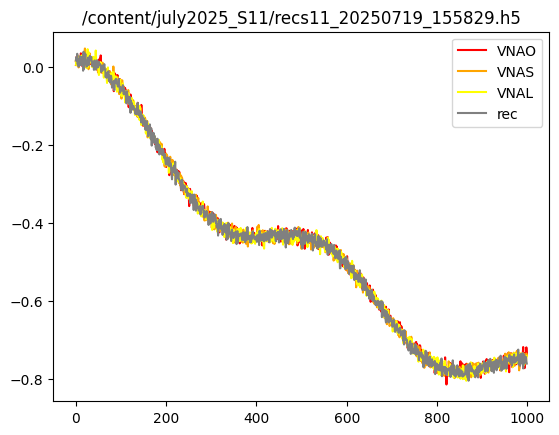

In [24]:
shows11("/content/july2025_S11/recs11_20250719_155829.h5")

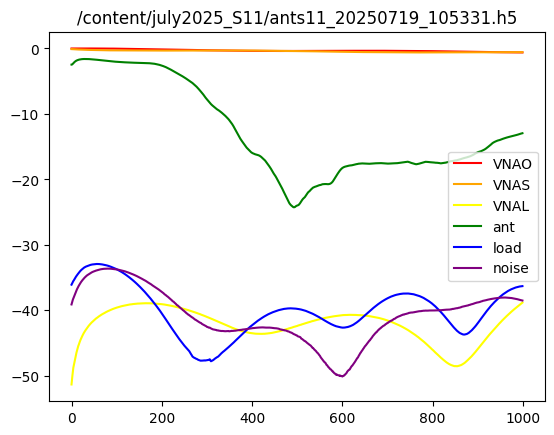

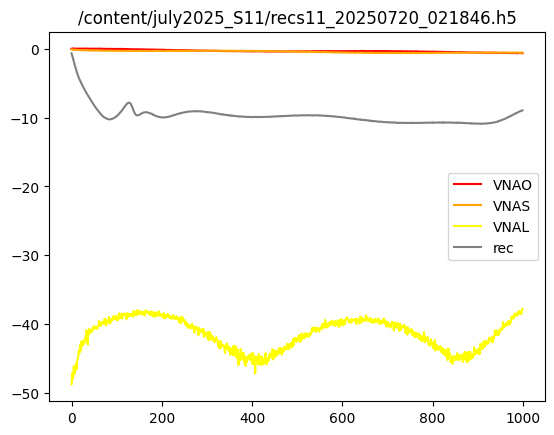

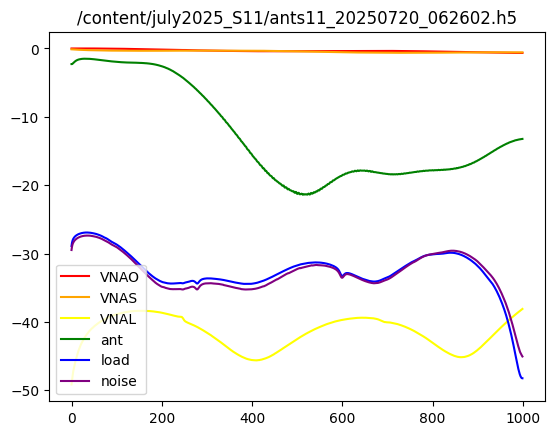

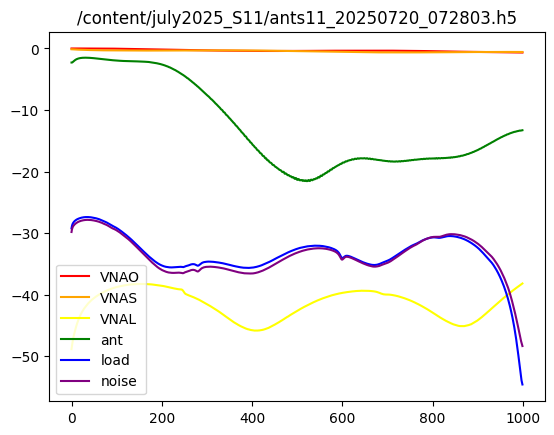

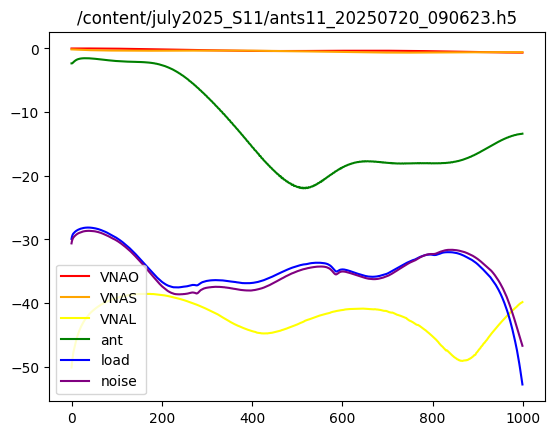

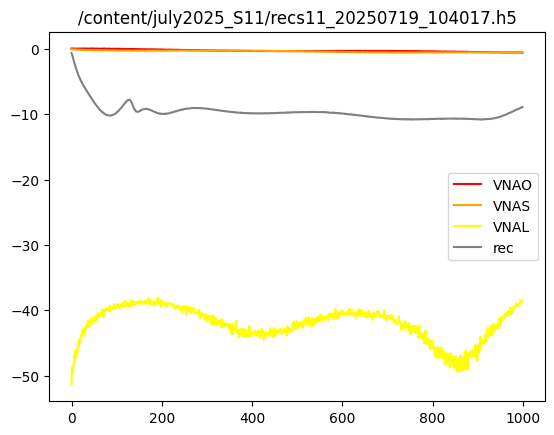

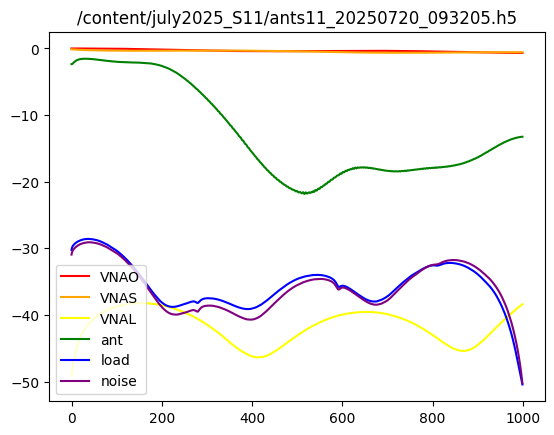

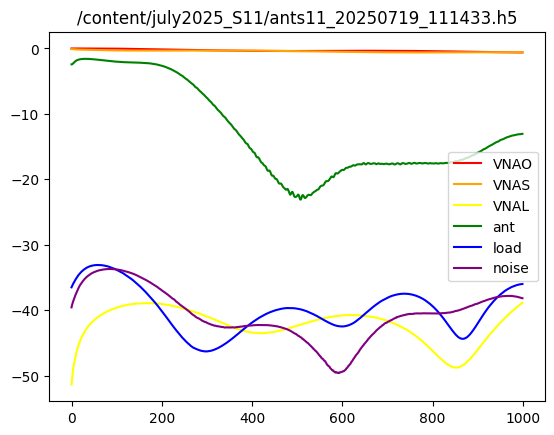

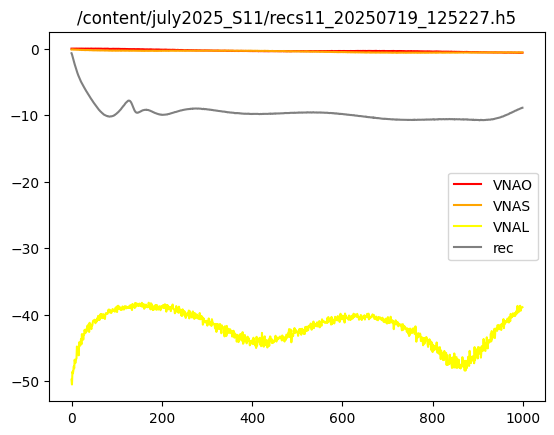

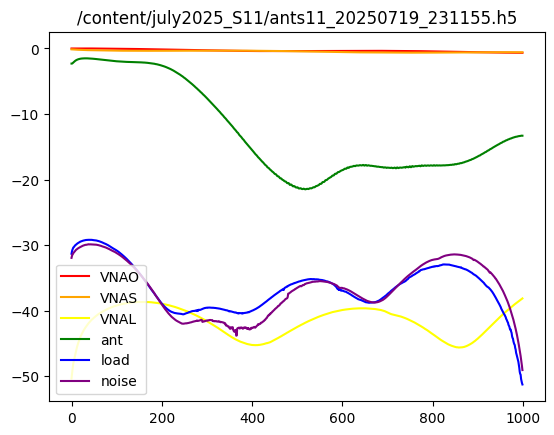

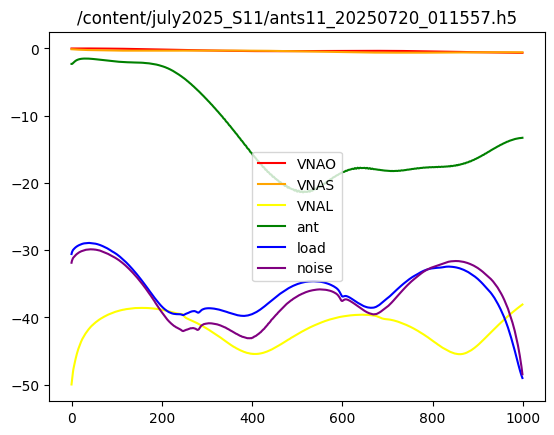

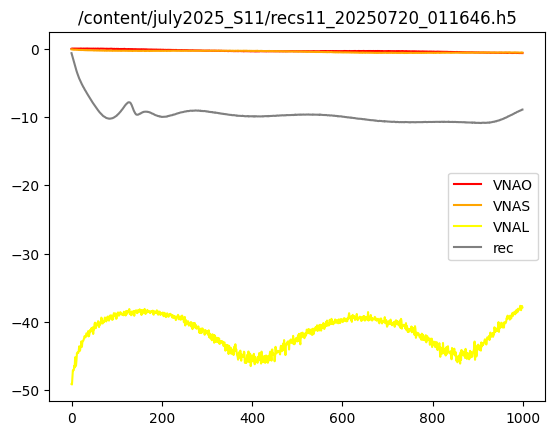

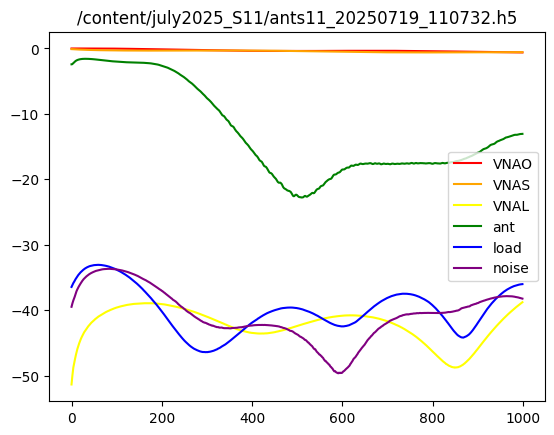

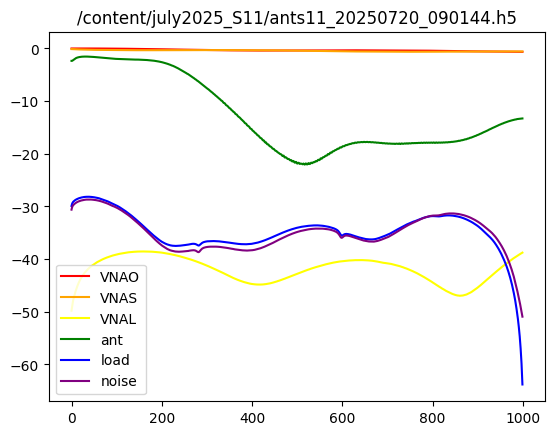

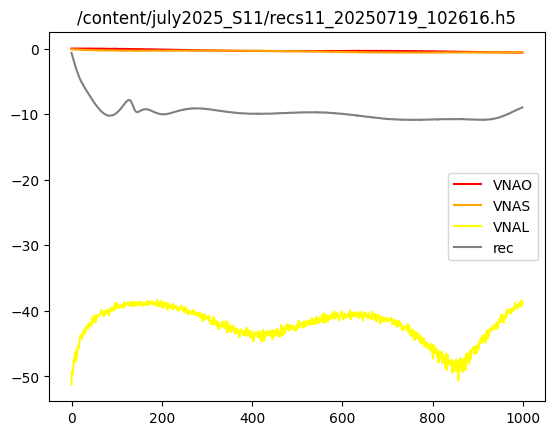

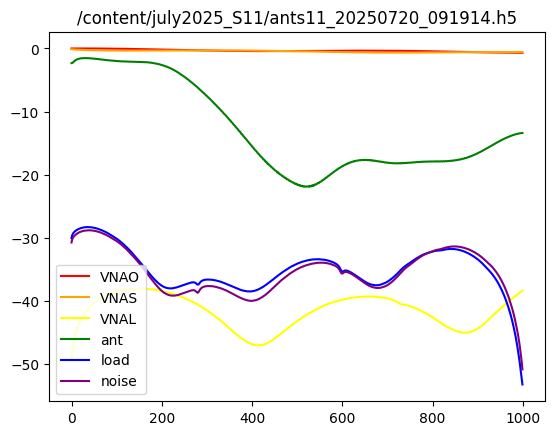

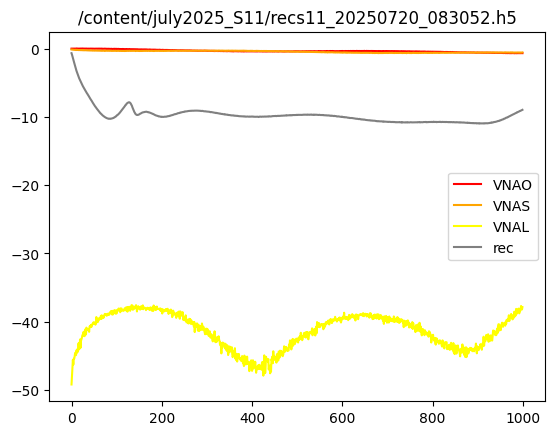

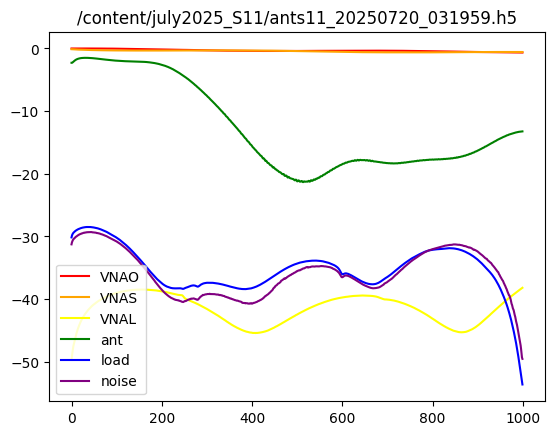

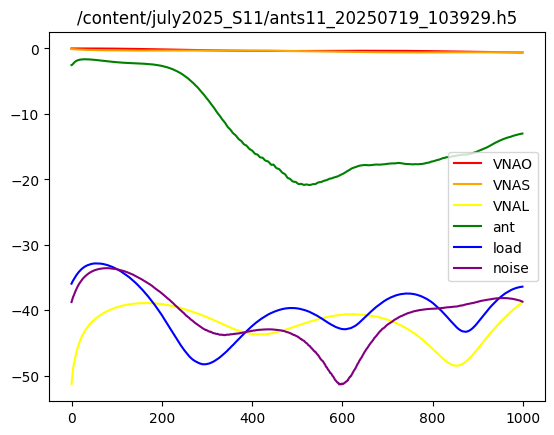

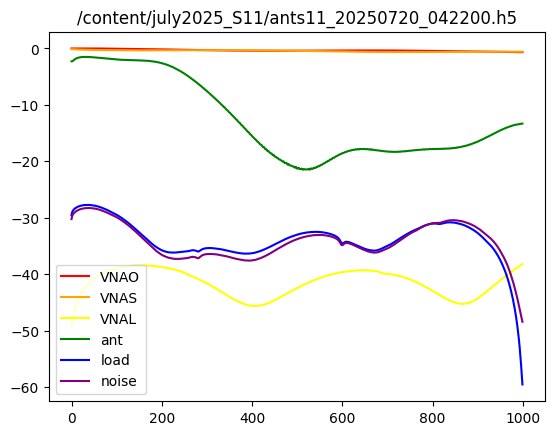

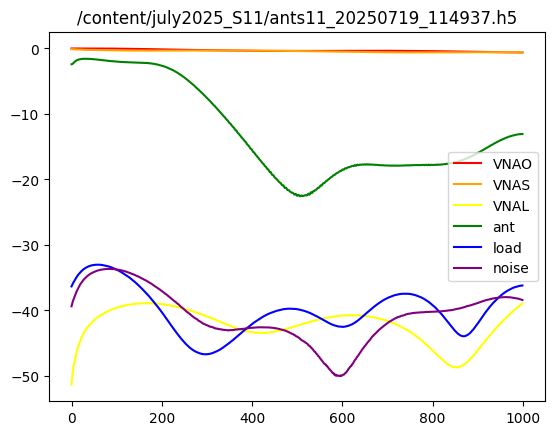

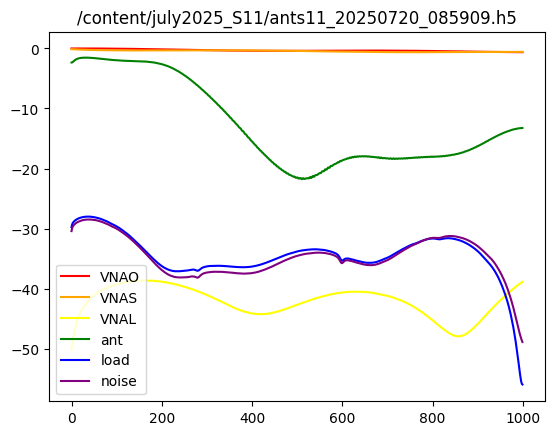

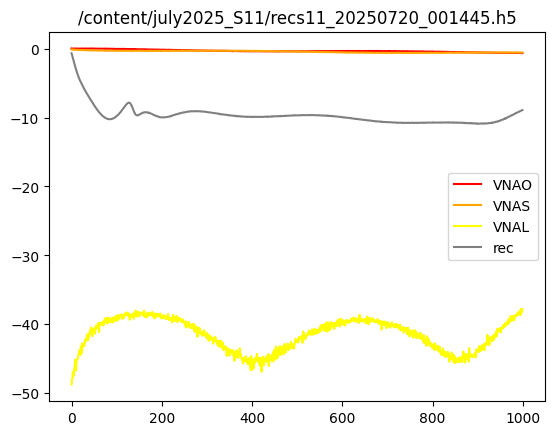

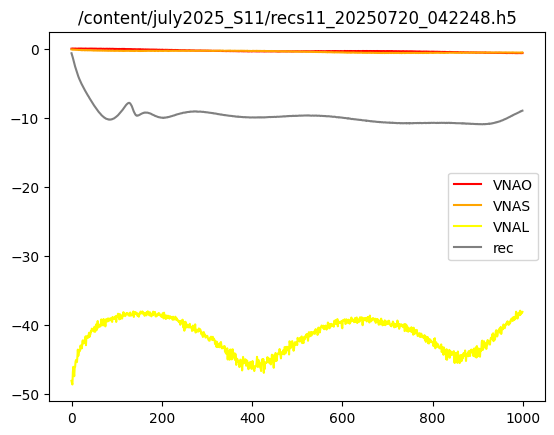

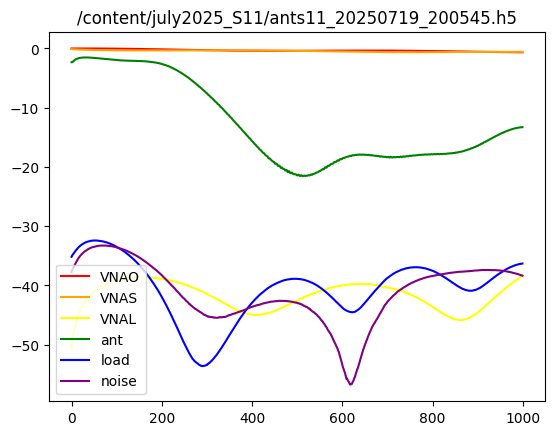

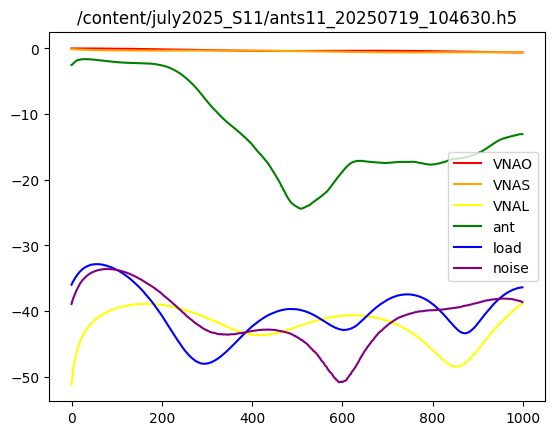

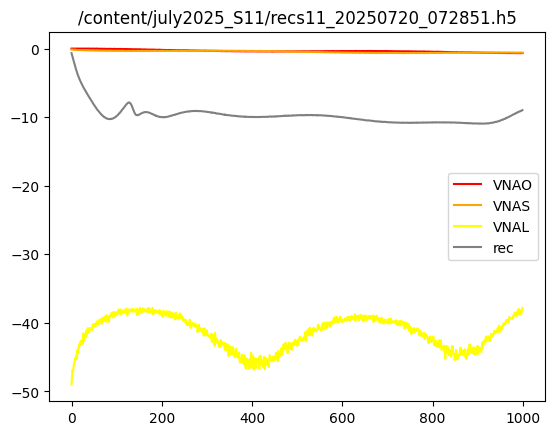

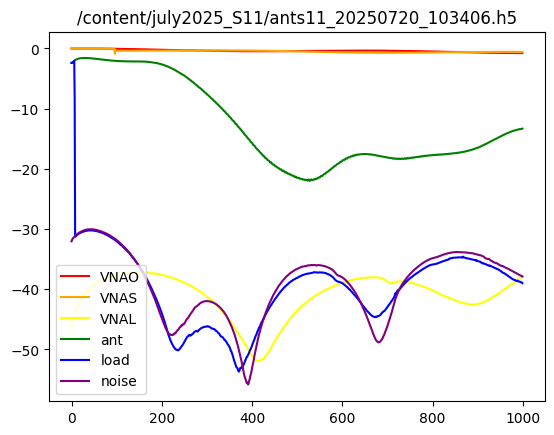

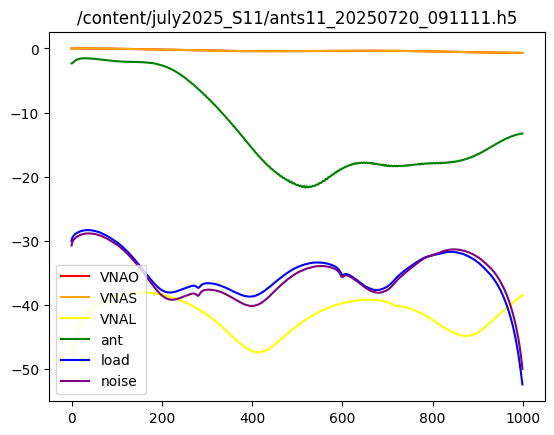

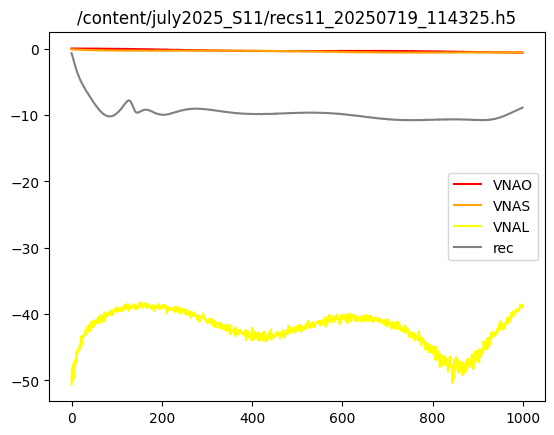

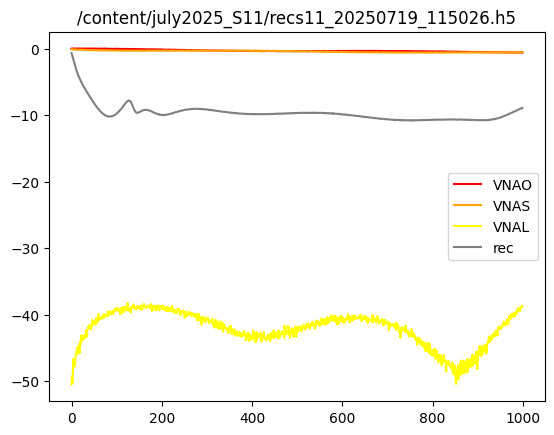

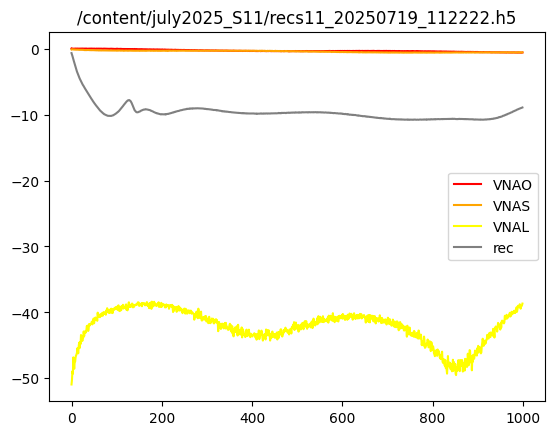

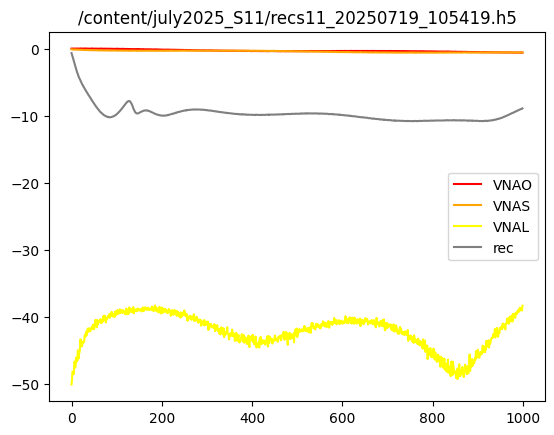

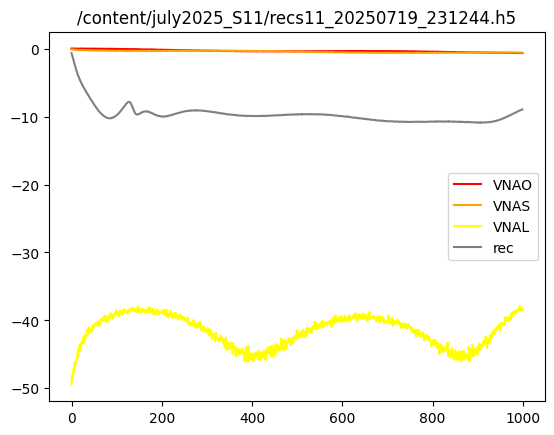

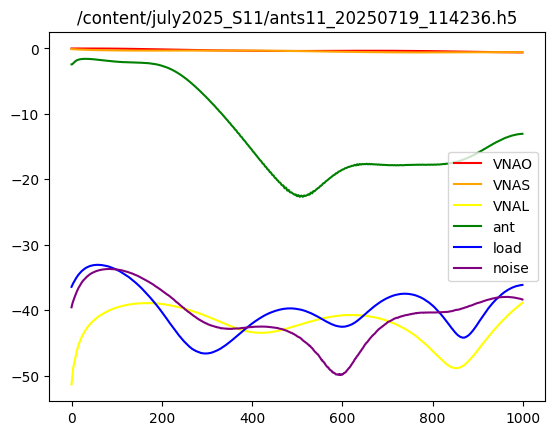

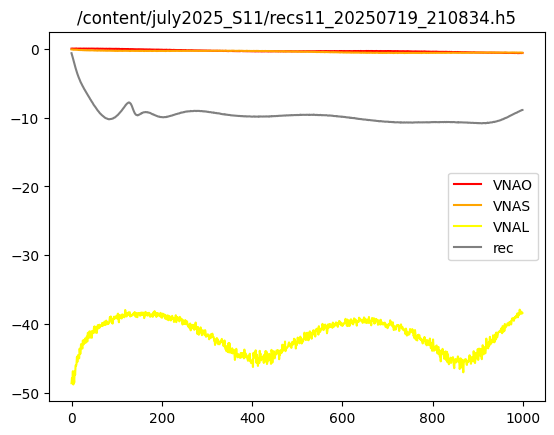

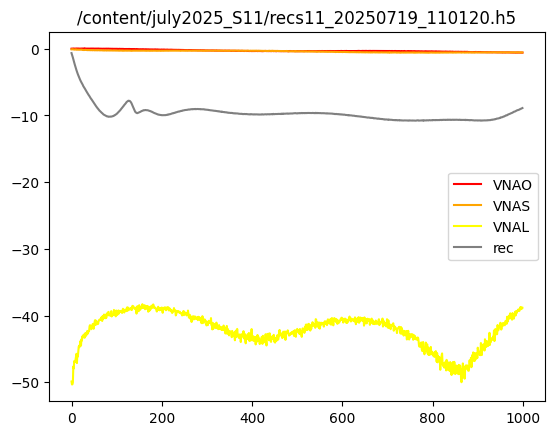

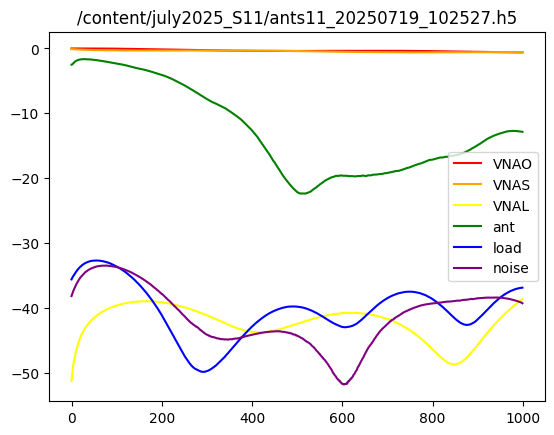

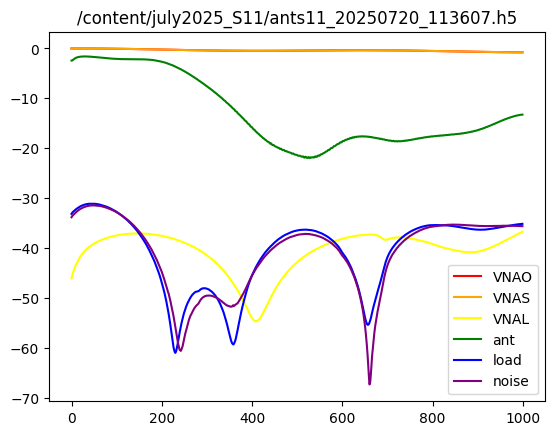

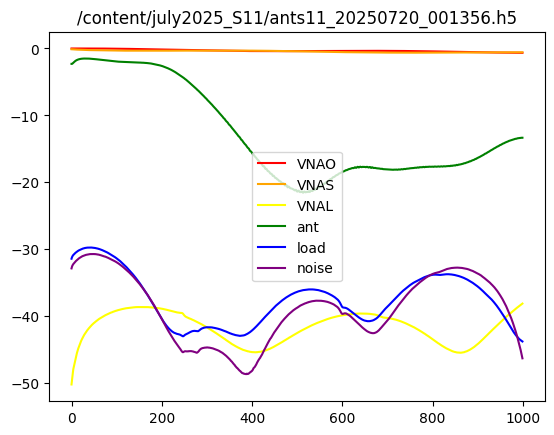

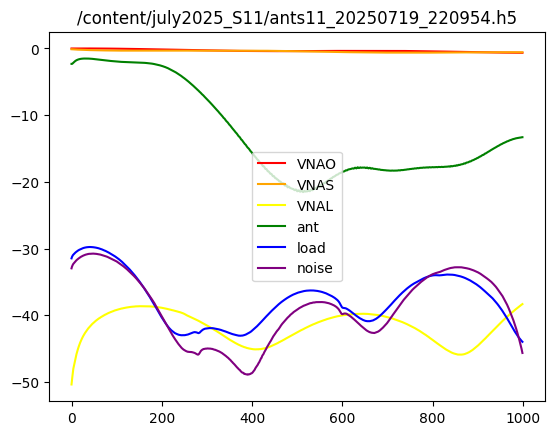

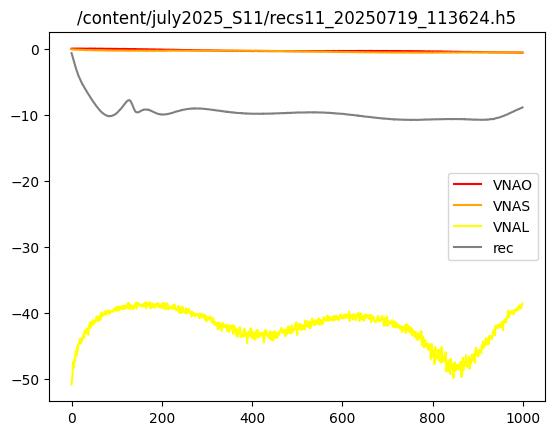

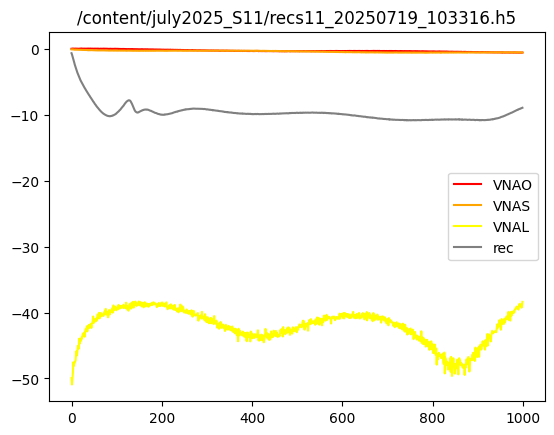

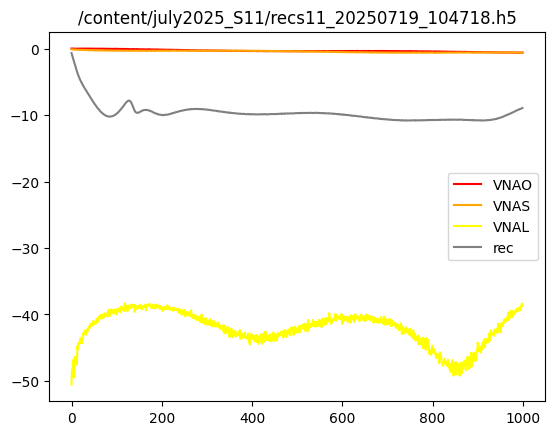

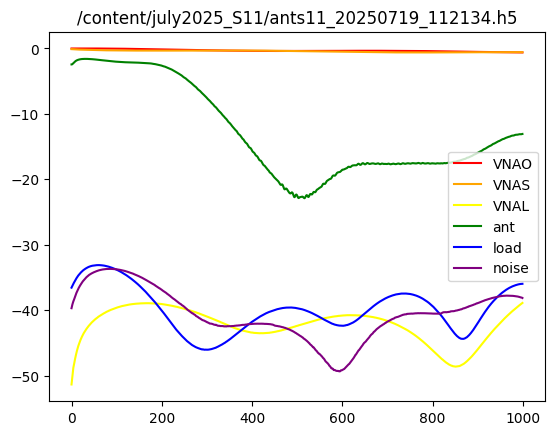

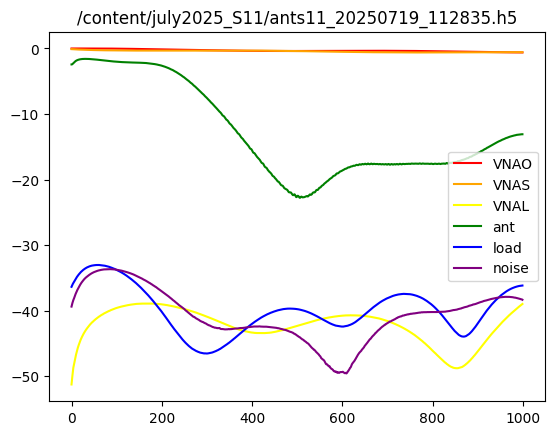

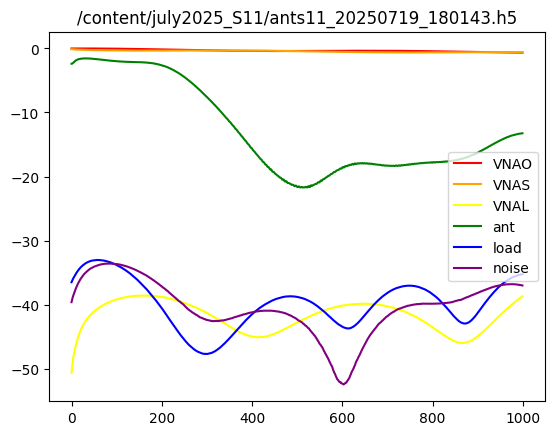

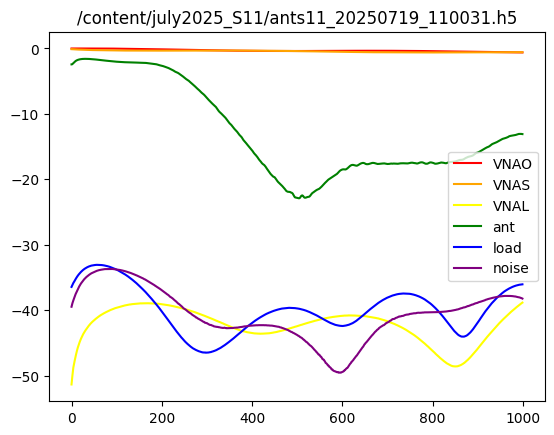

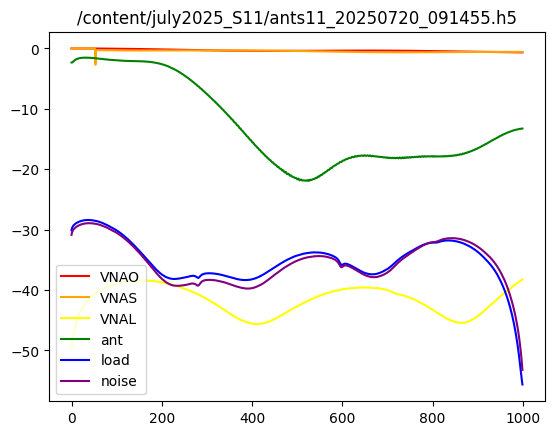

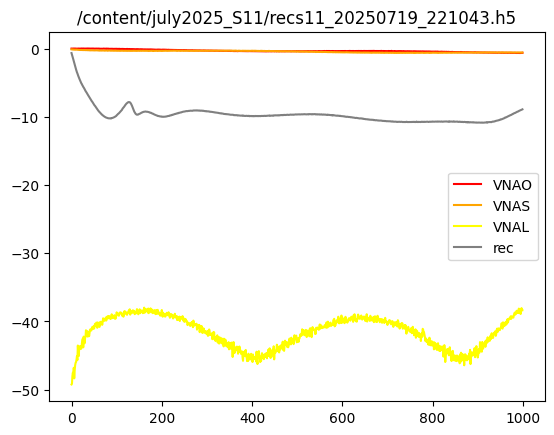

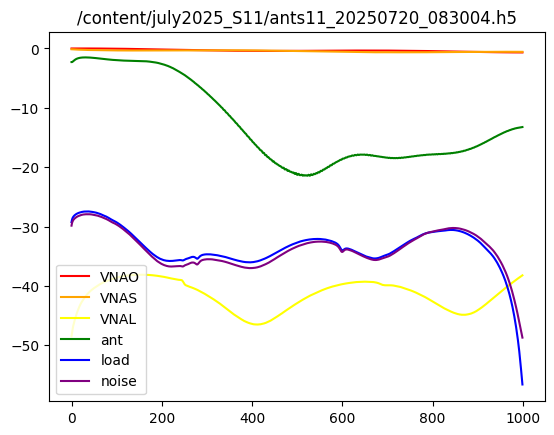

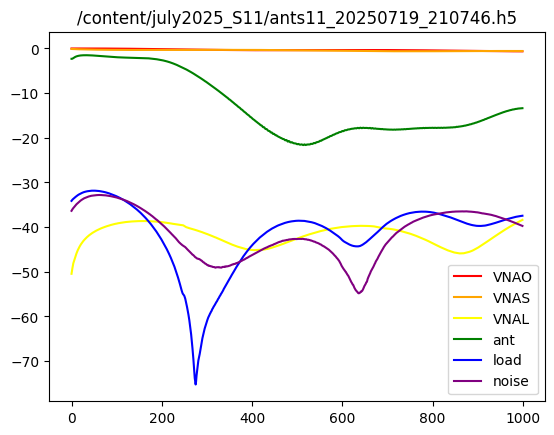

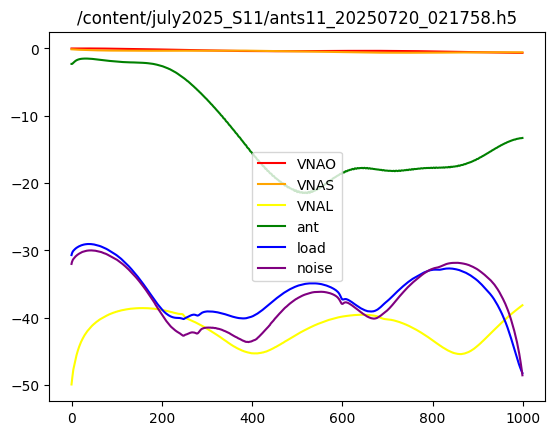

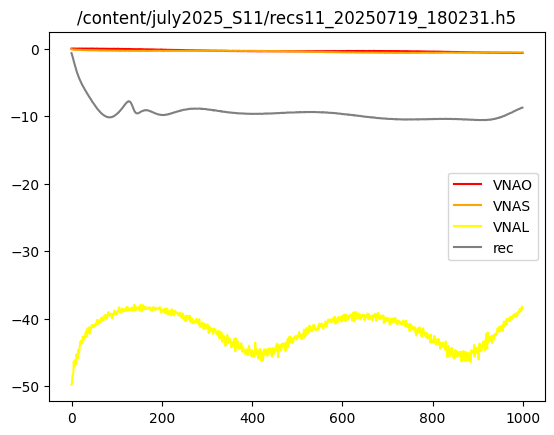

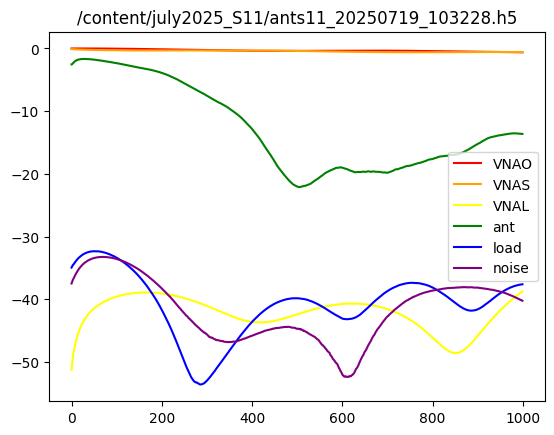

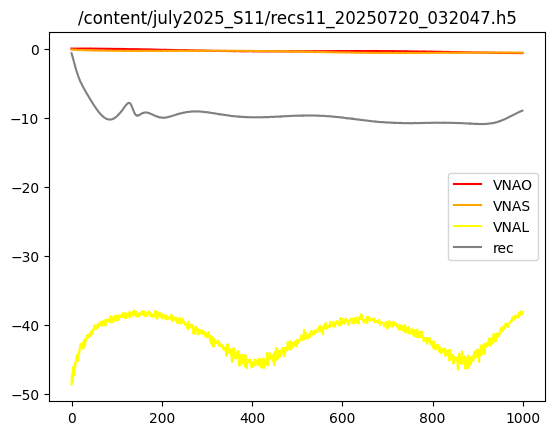

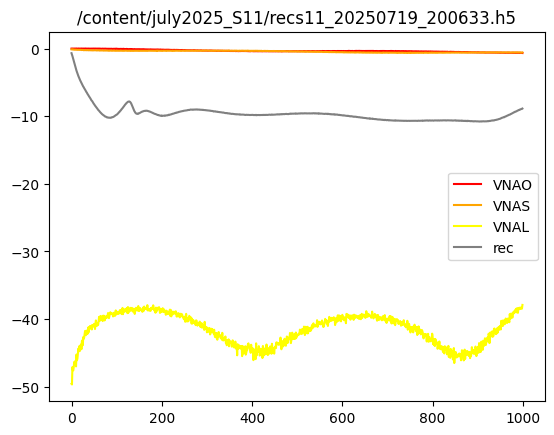

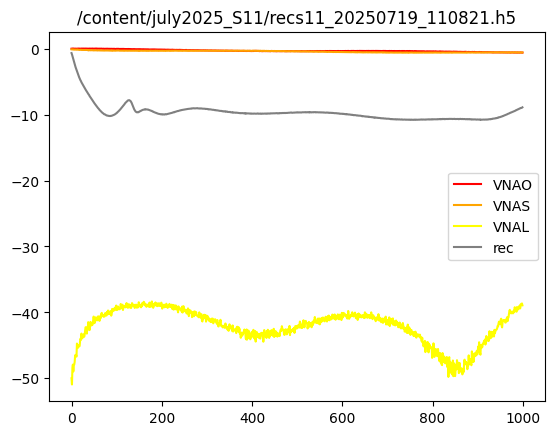

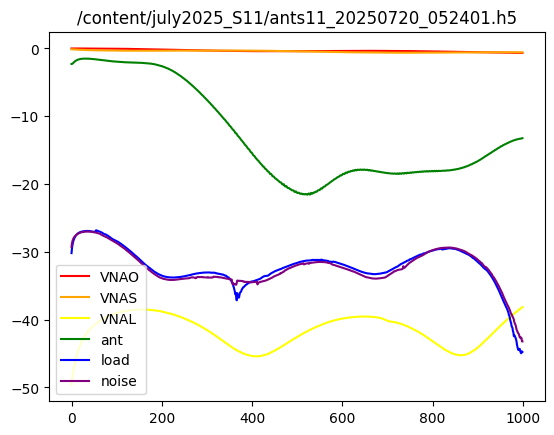

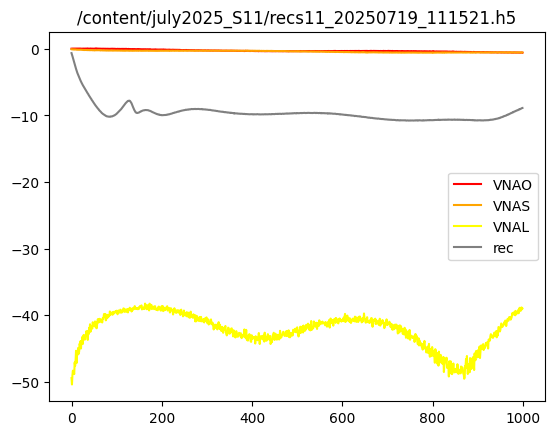

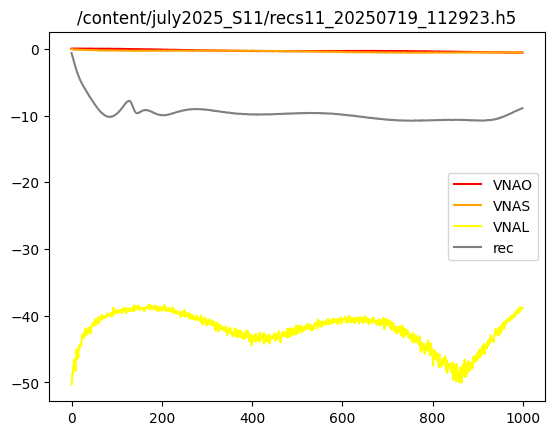

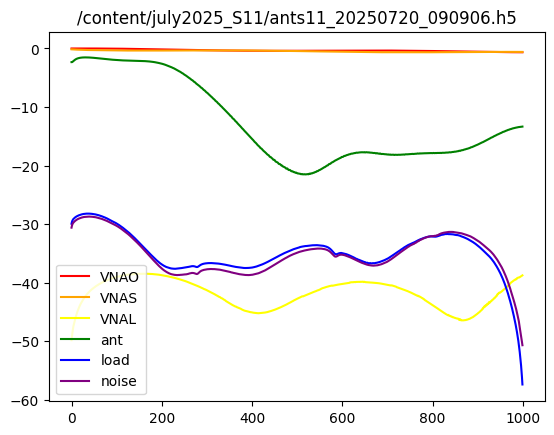

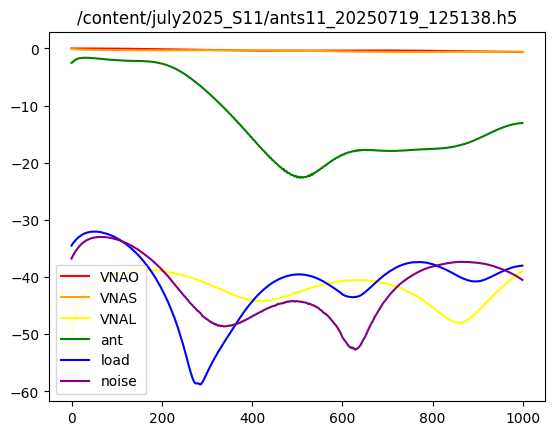

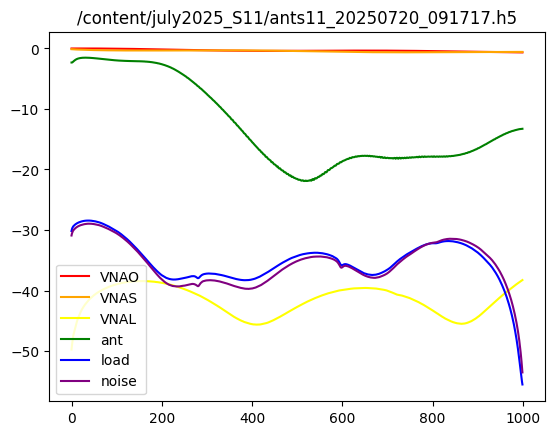

In [11]:
displayNormal("/content/july2025_S11", whinese)

In [ ]:
a = int(round(float(countFiles("/content/july2025_S11") - len(whinese)) / float(countFiles("/content/july2025_S11")) * 100, 0))
print("~" + str(a) + "% of the files are normal.")

~66% of the files are normal.


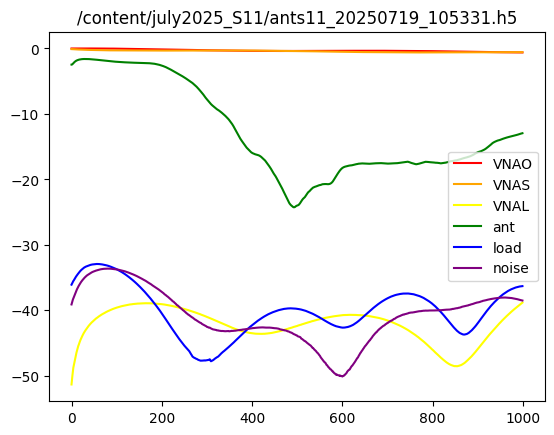

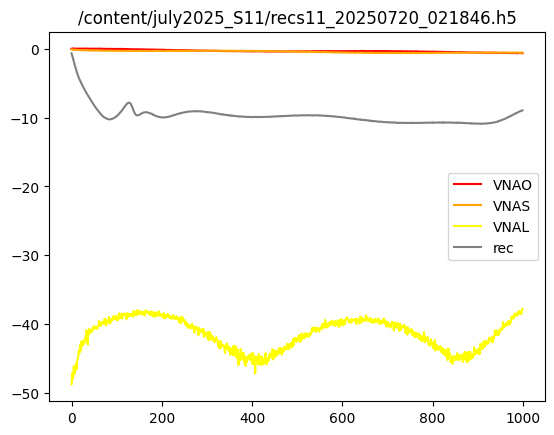

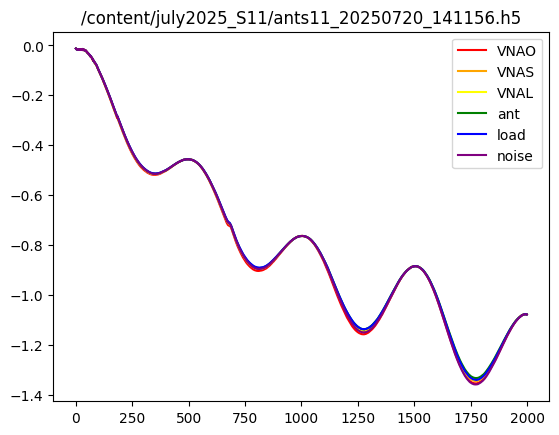

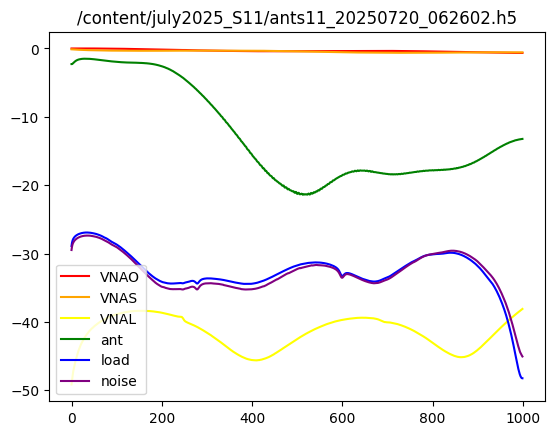

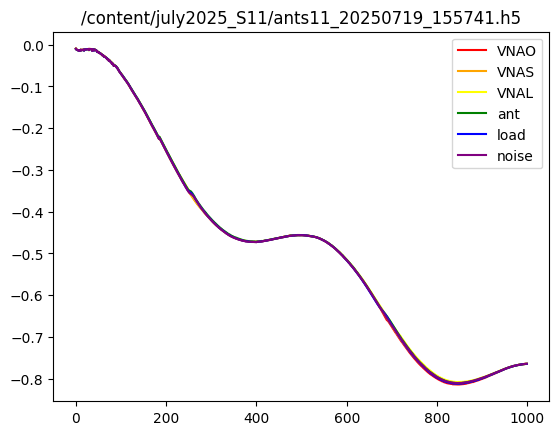

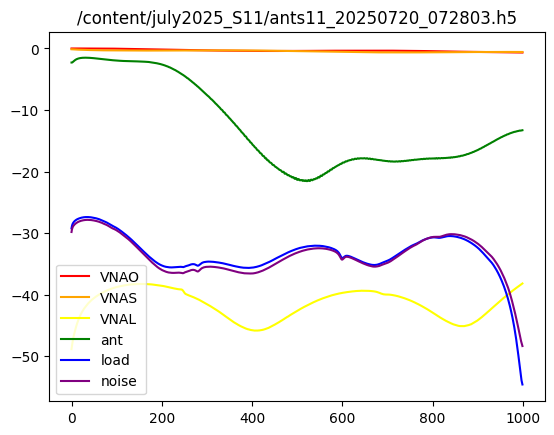

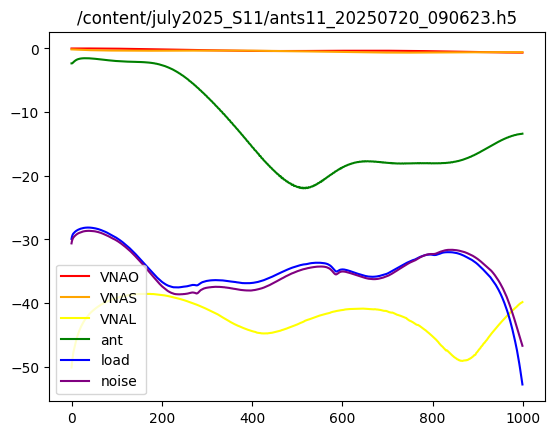

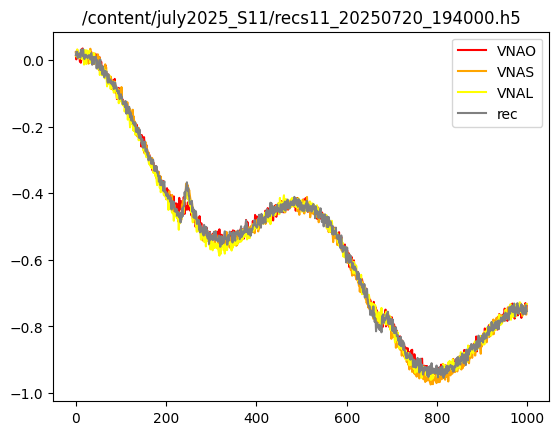

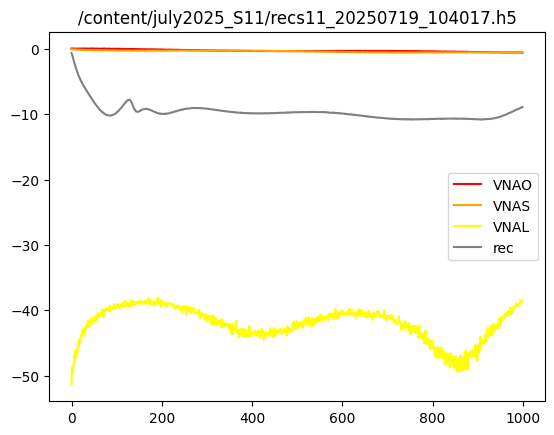

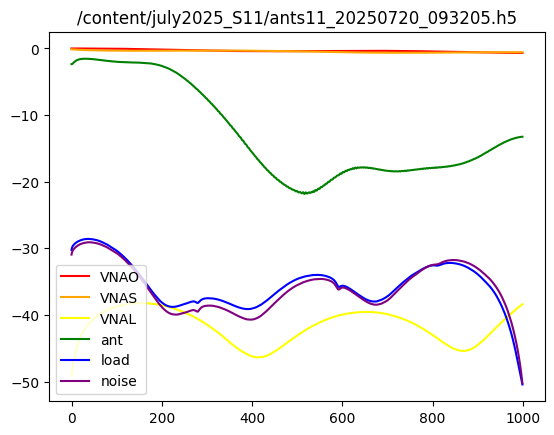

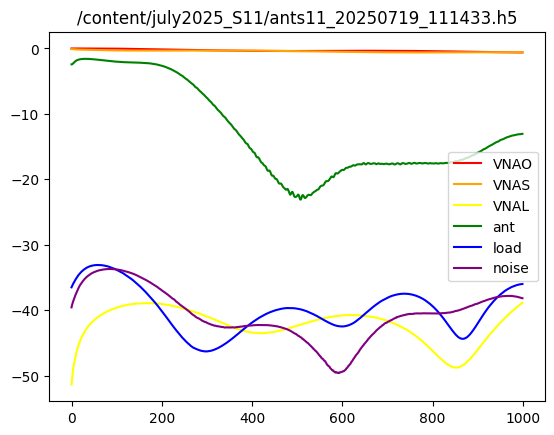

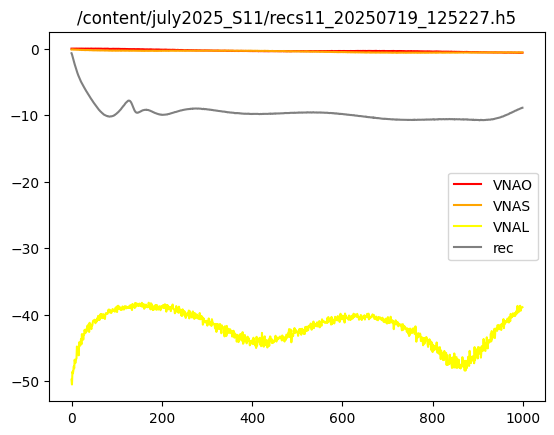

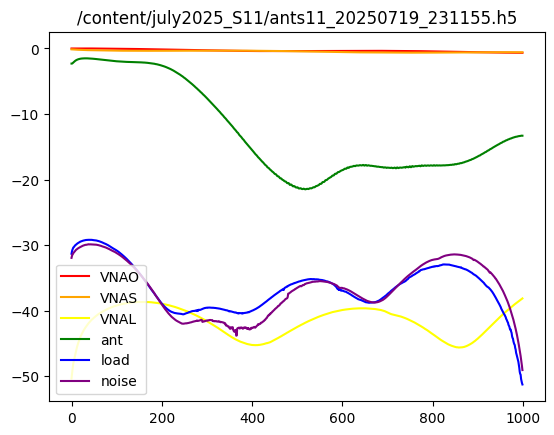

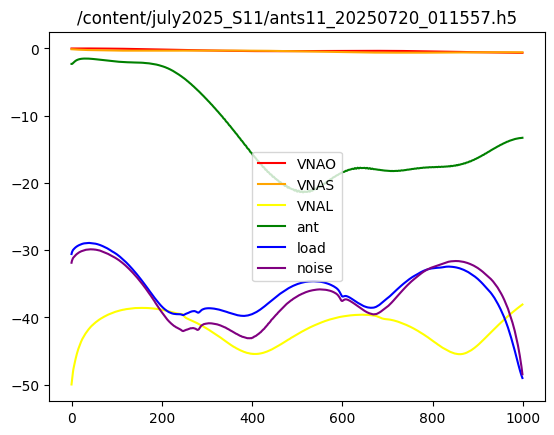

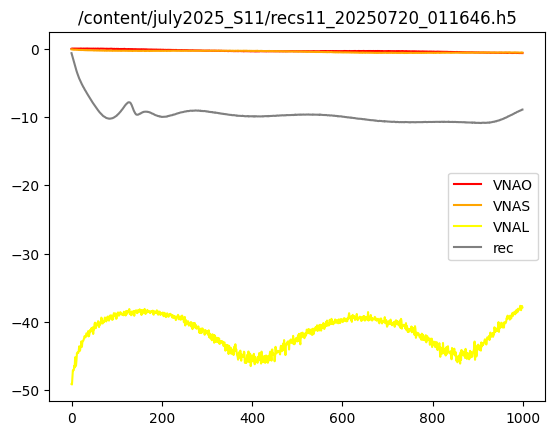

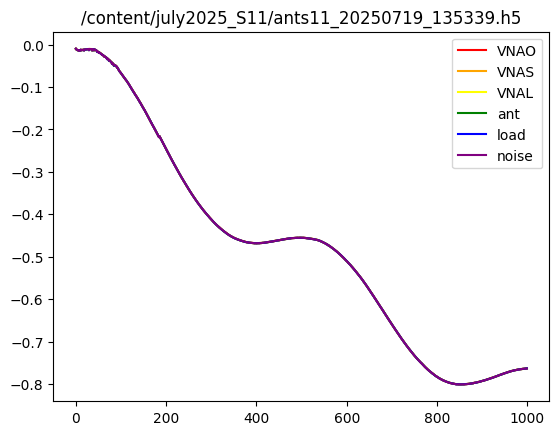

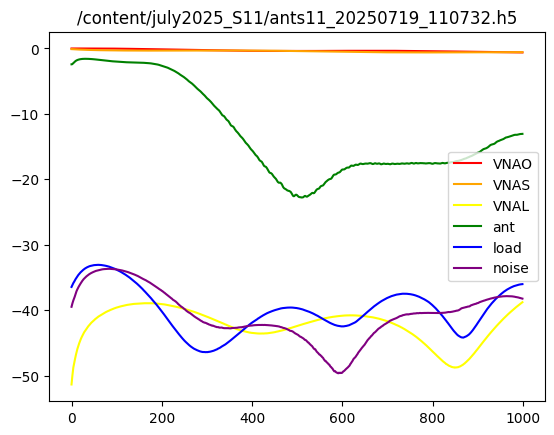

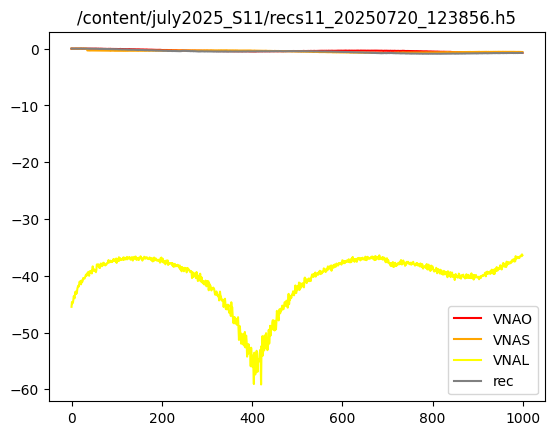

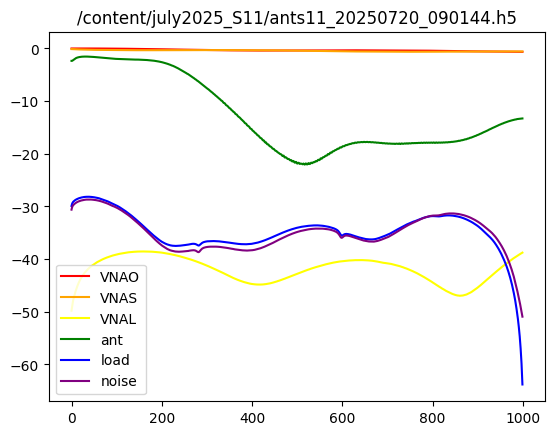

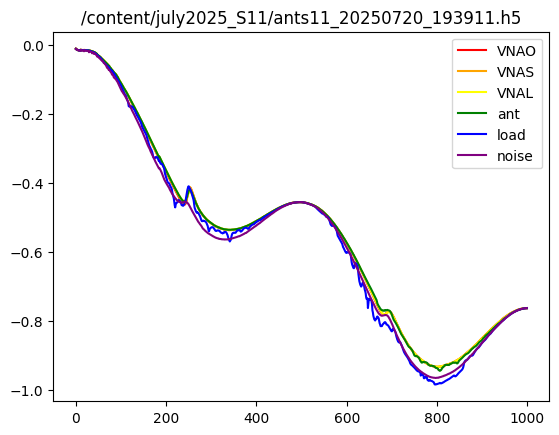

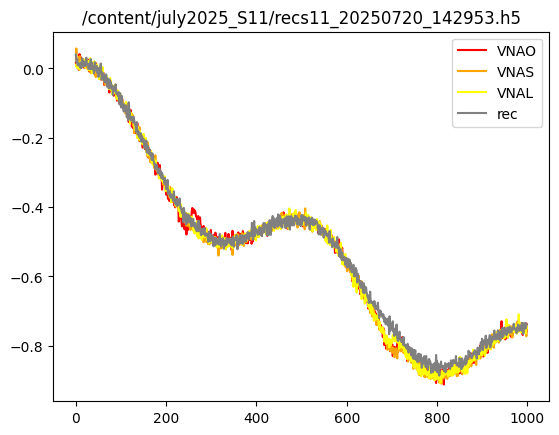

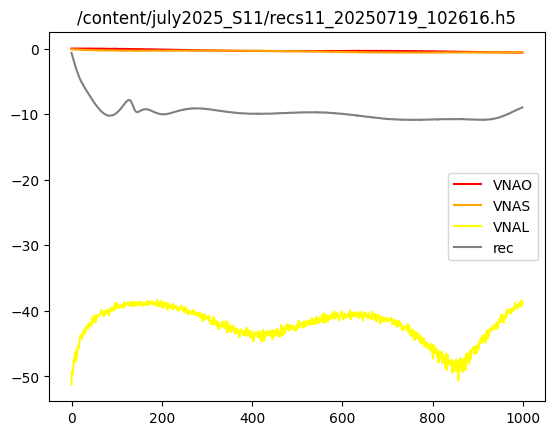

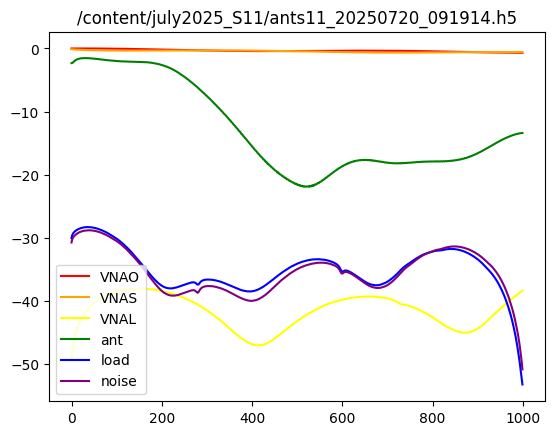

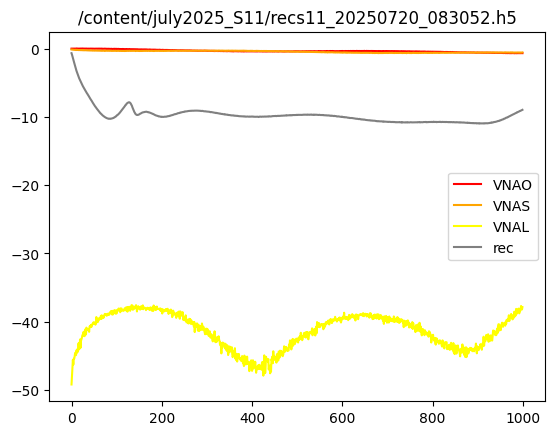

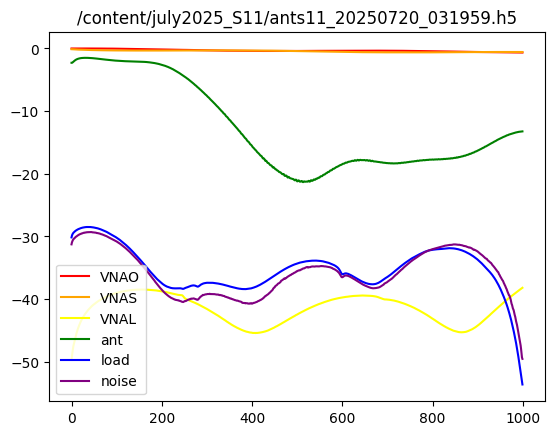

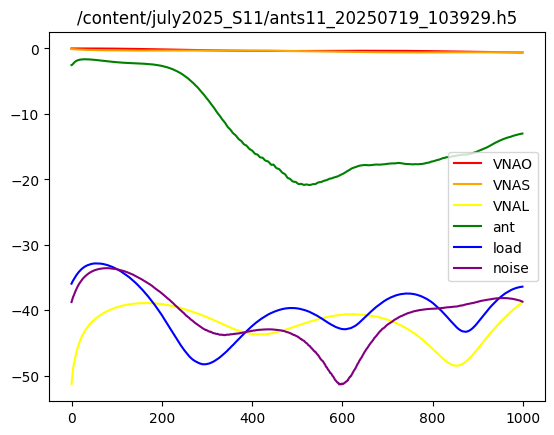

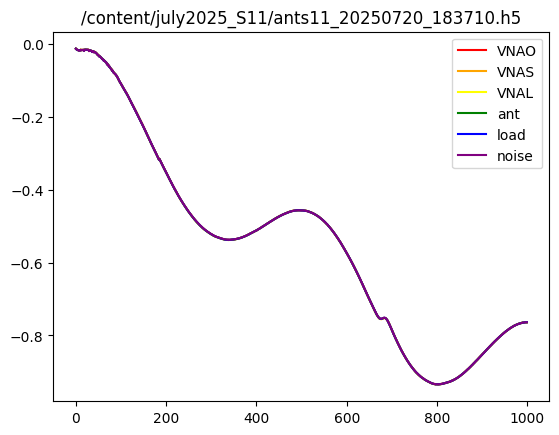

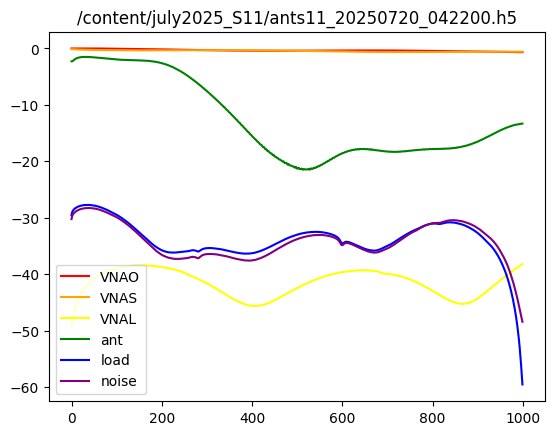

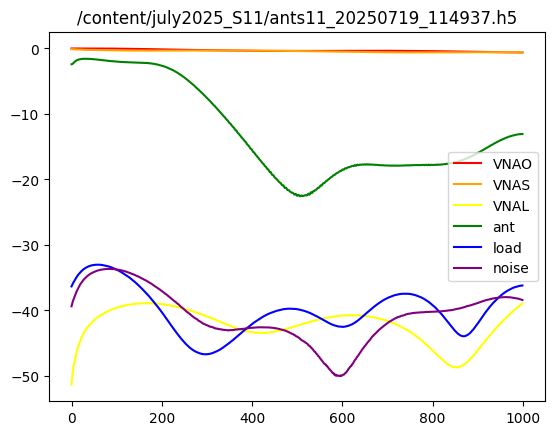

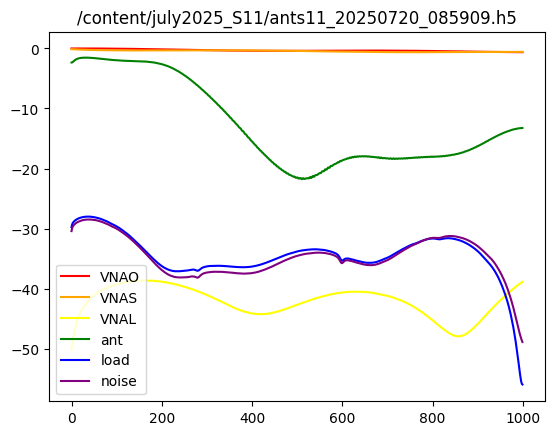

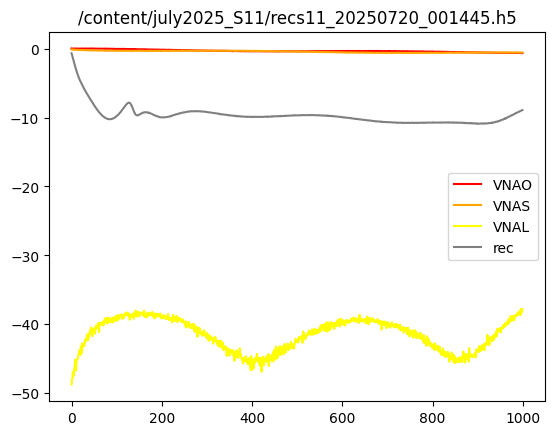

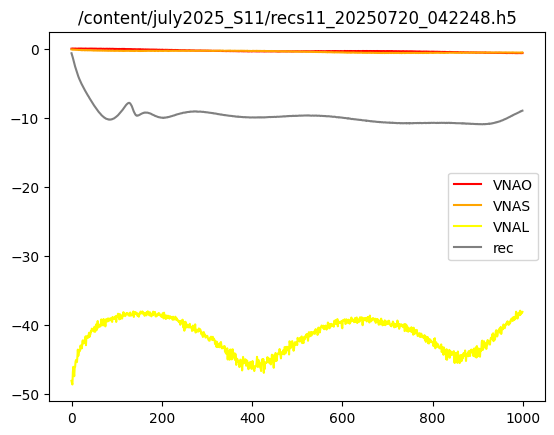

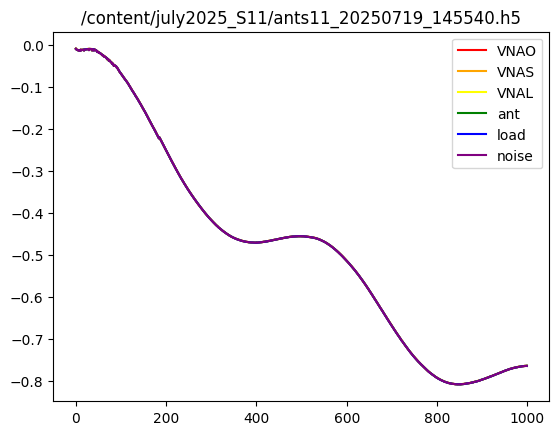

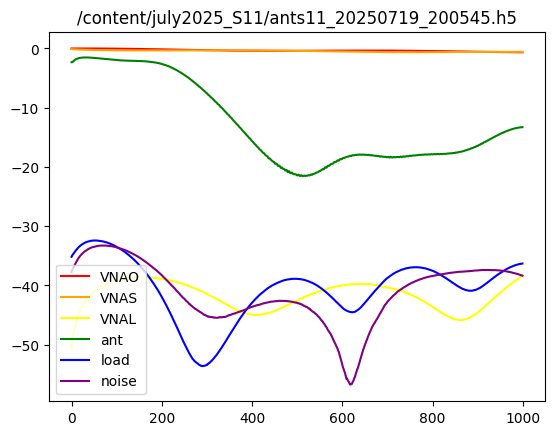

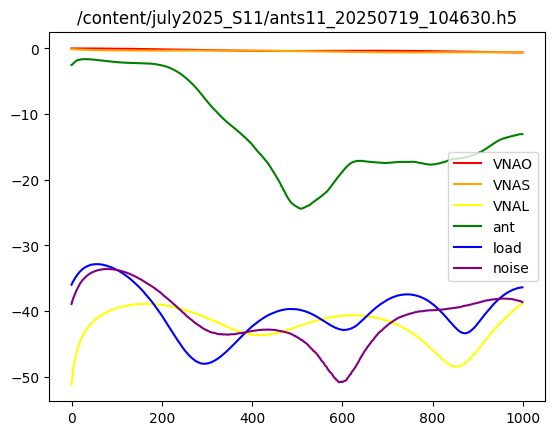

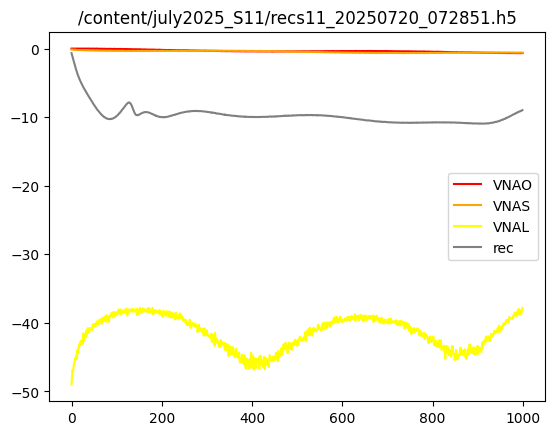

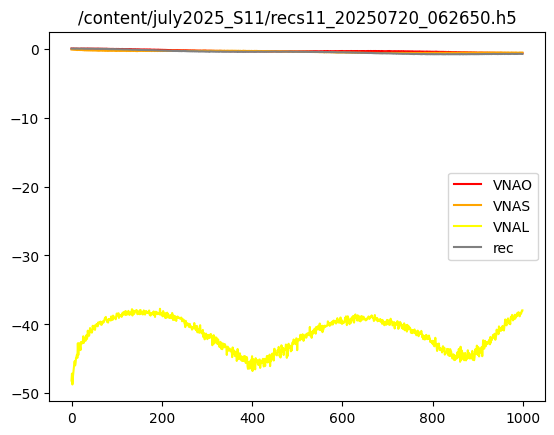

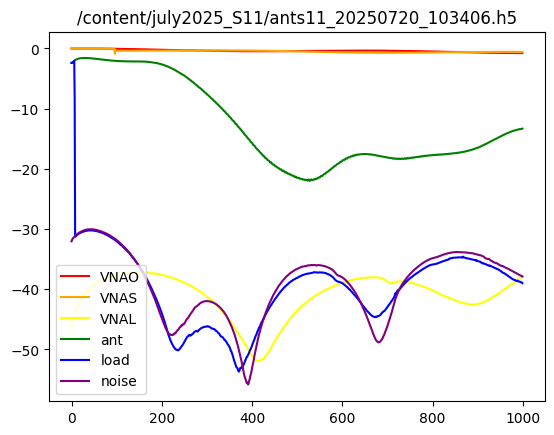

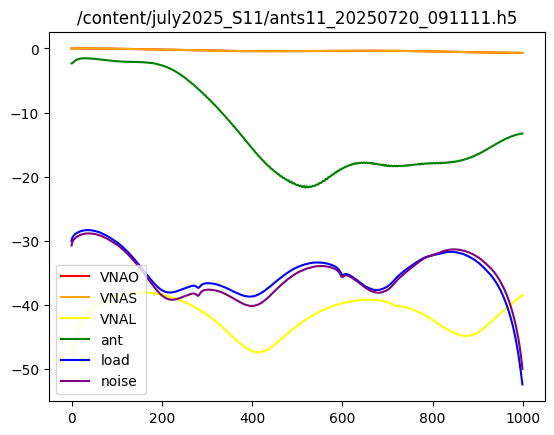

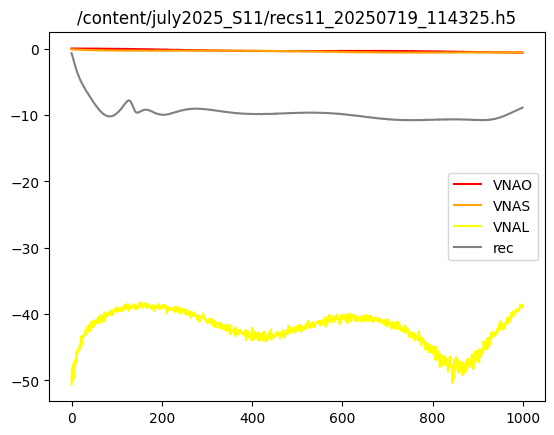

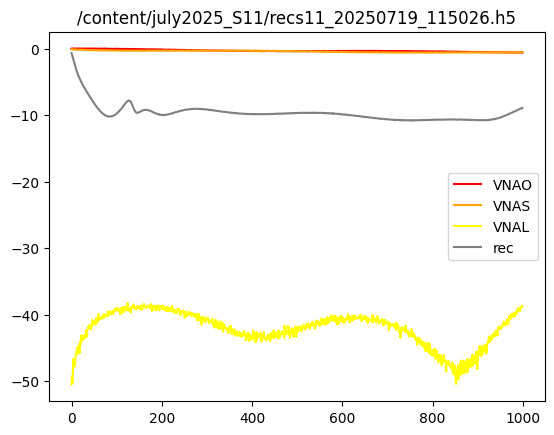

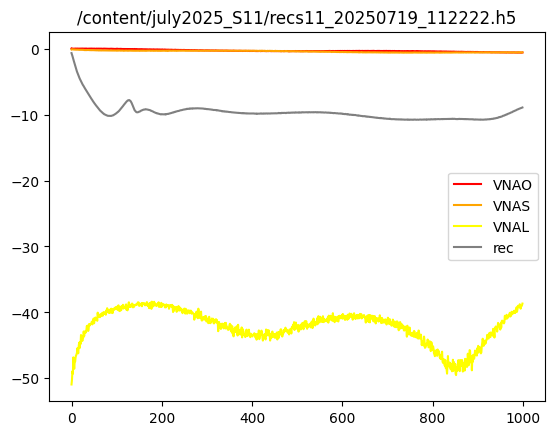

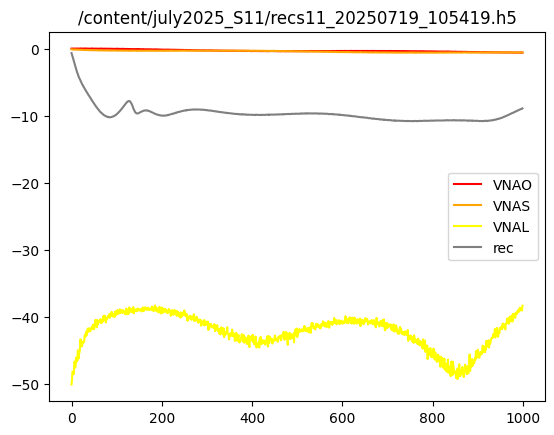

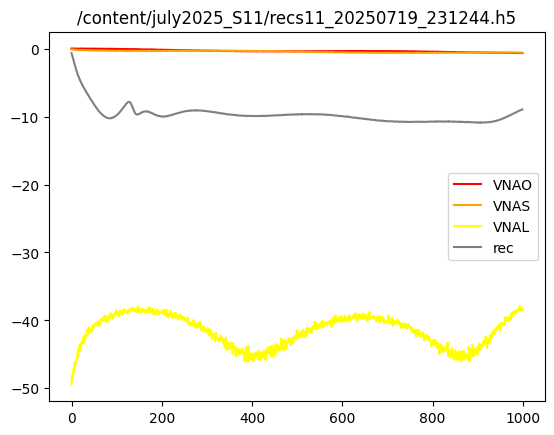

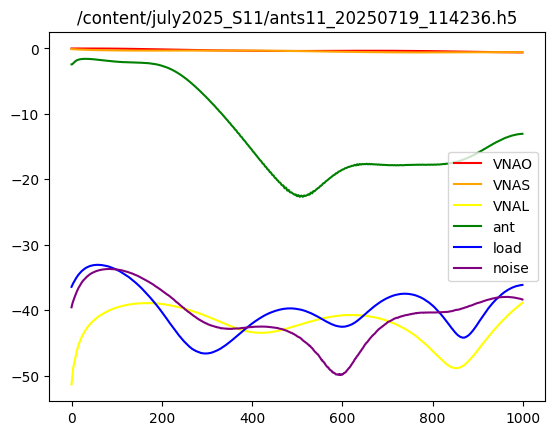

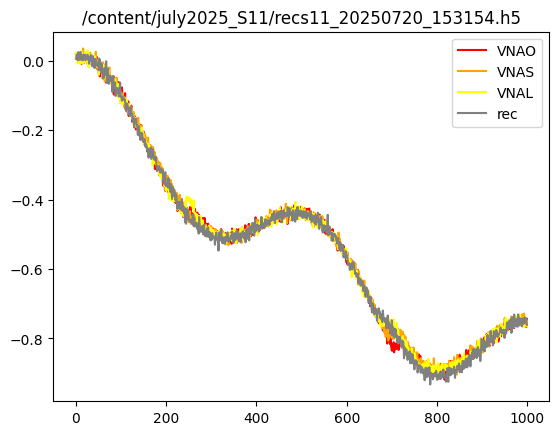

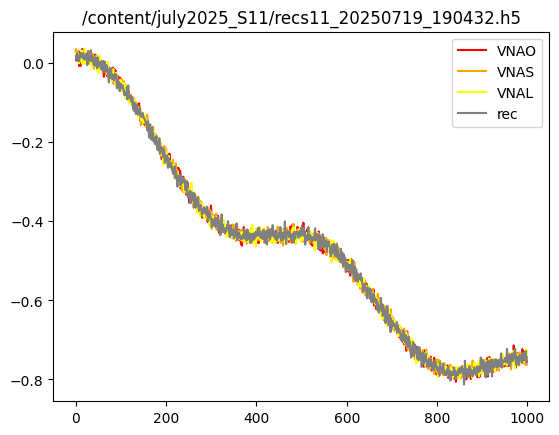

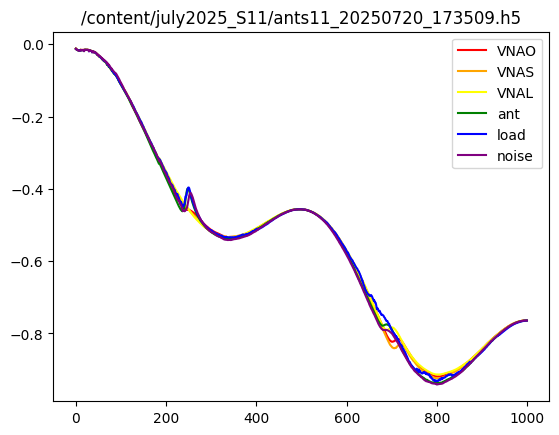

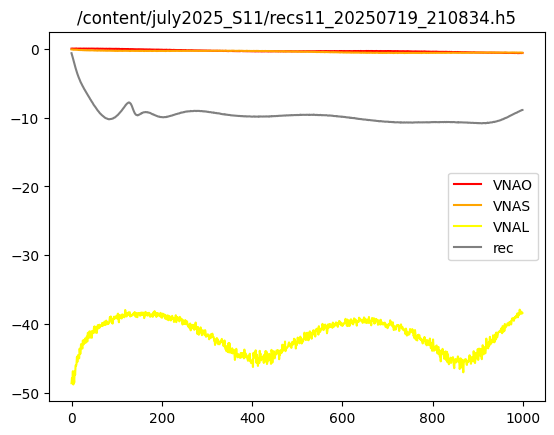

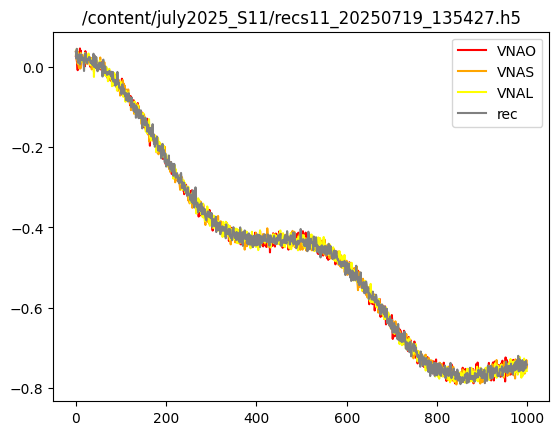

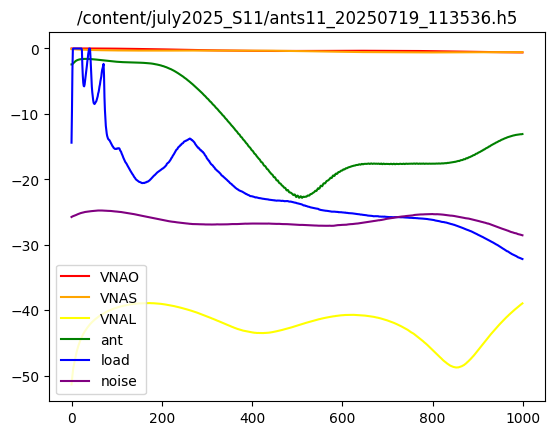

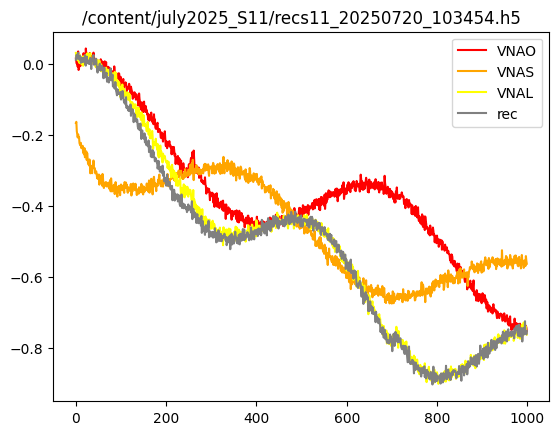

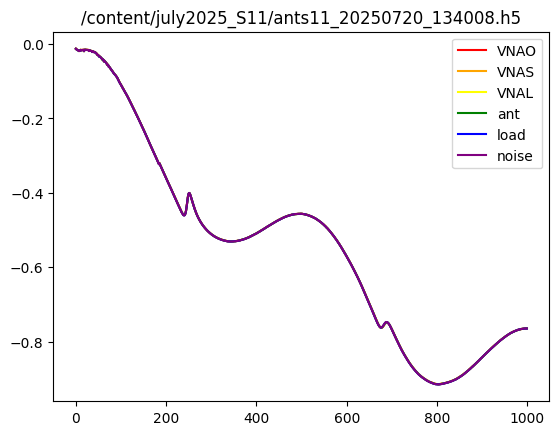

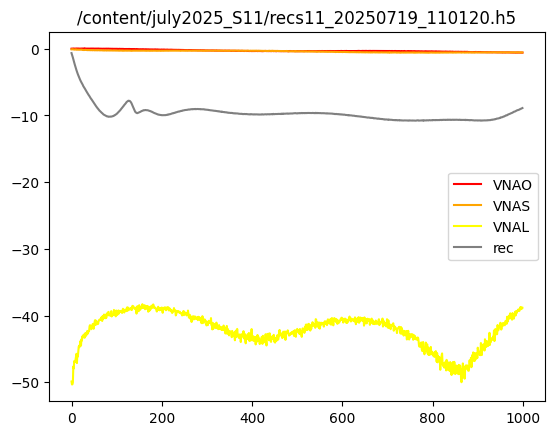

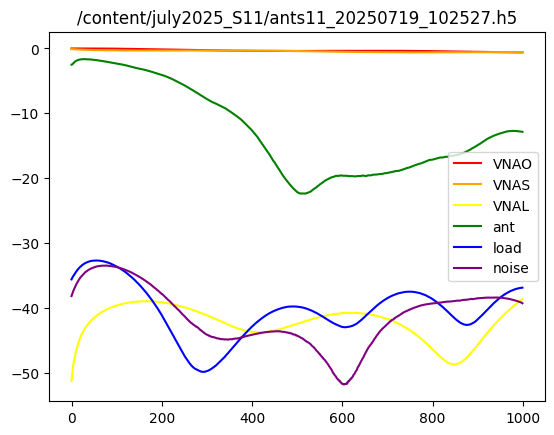

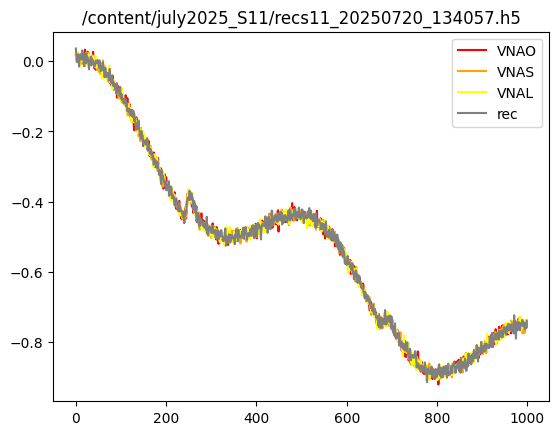

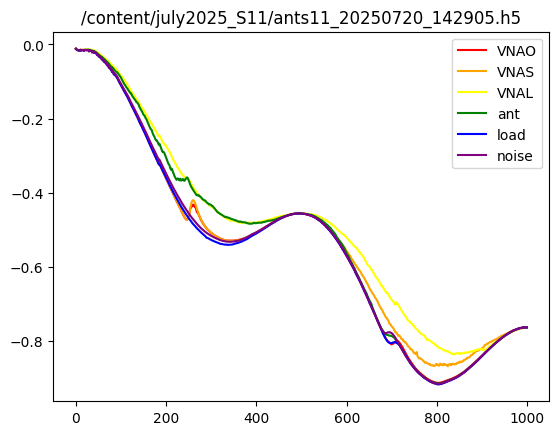

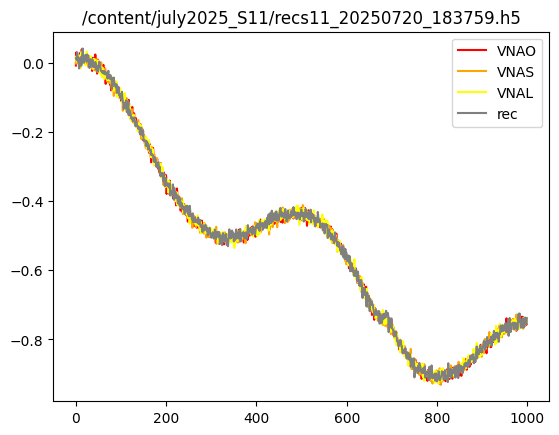

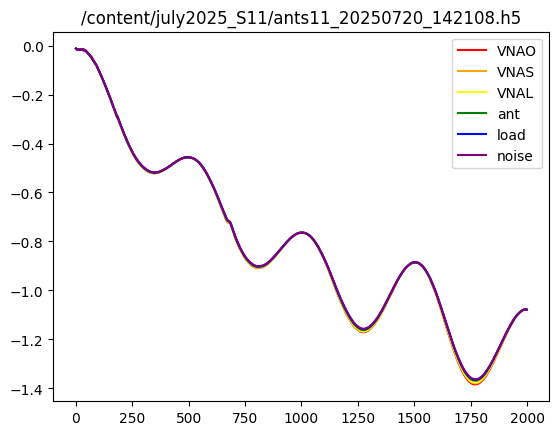

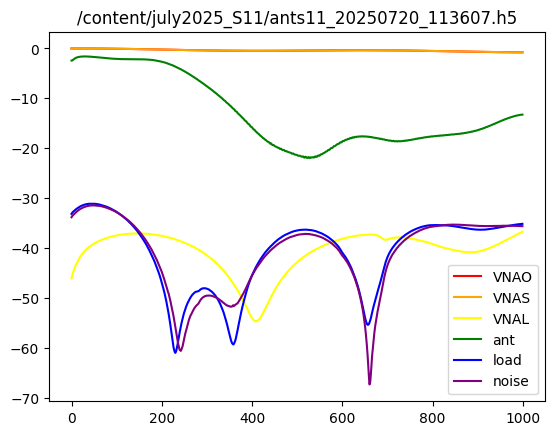

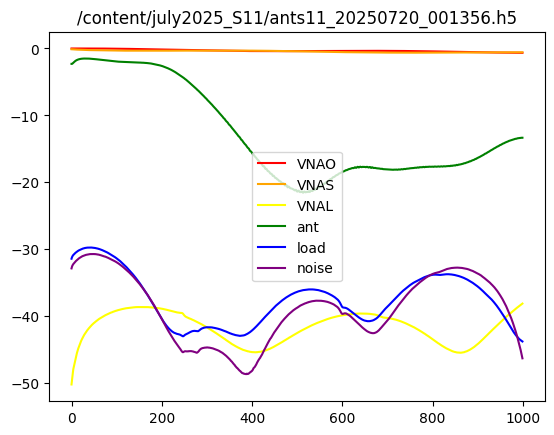

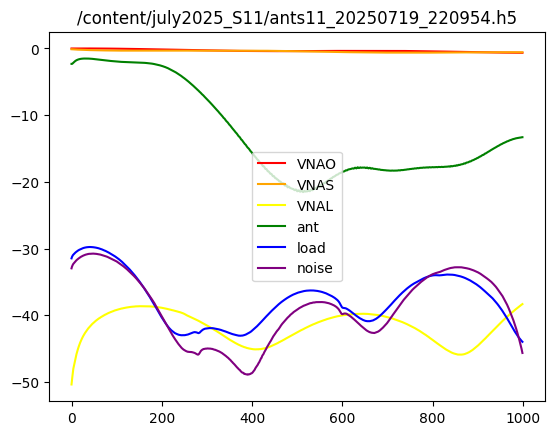

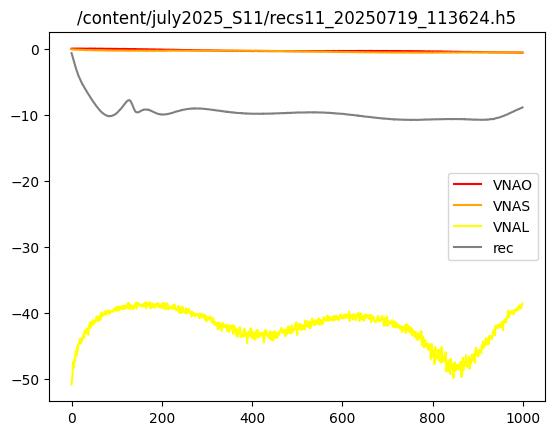

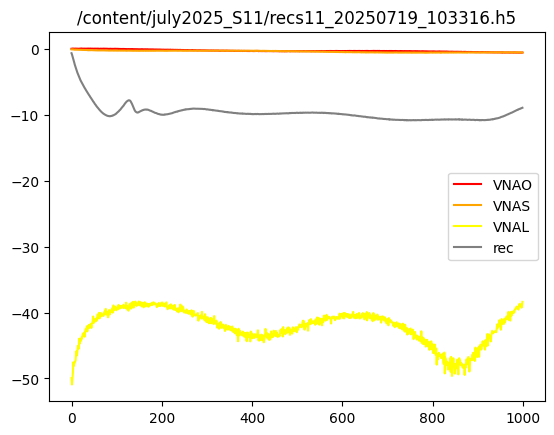

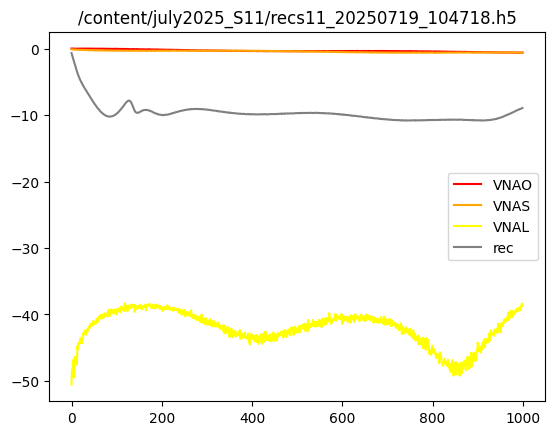

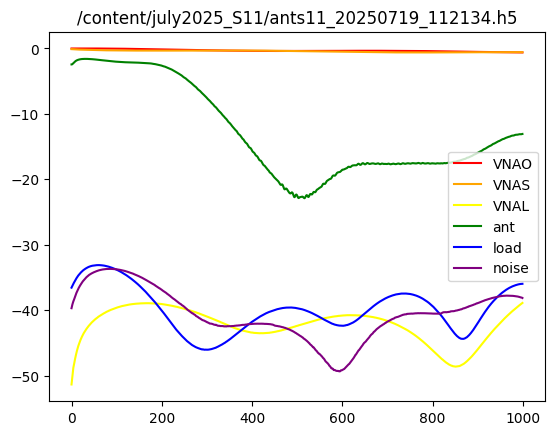

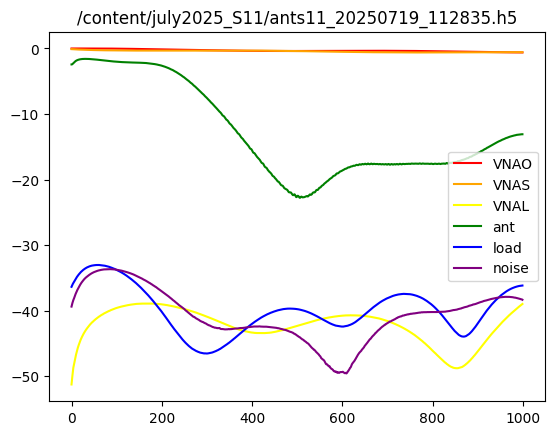

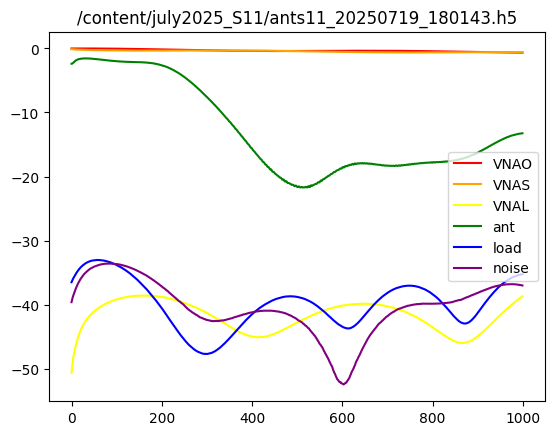

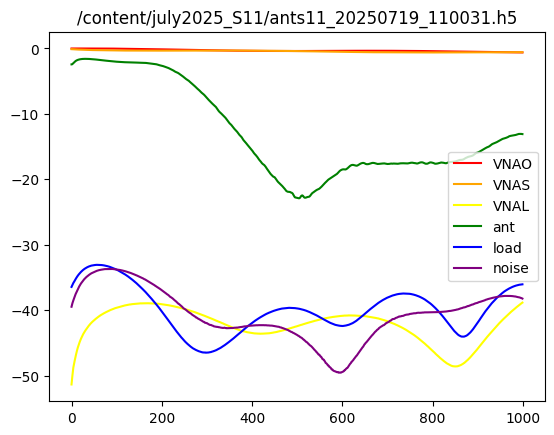

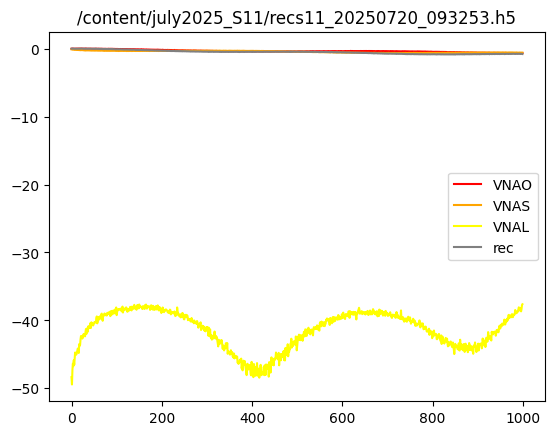

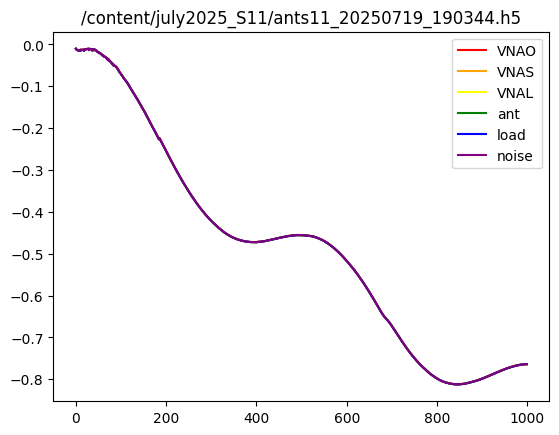

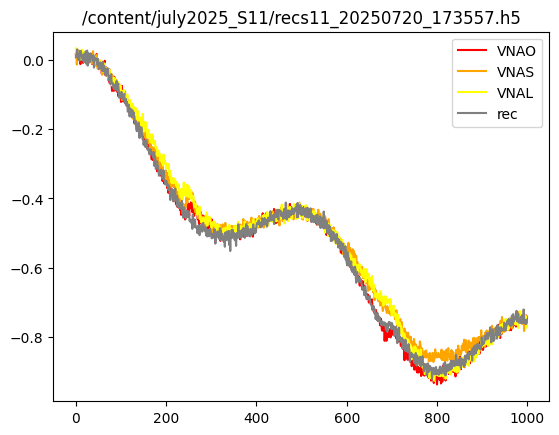

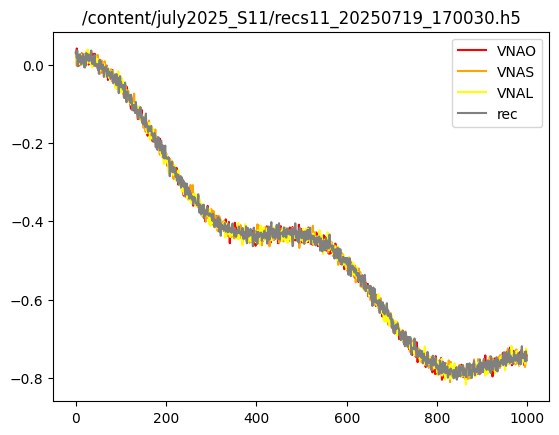

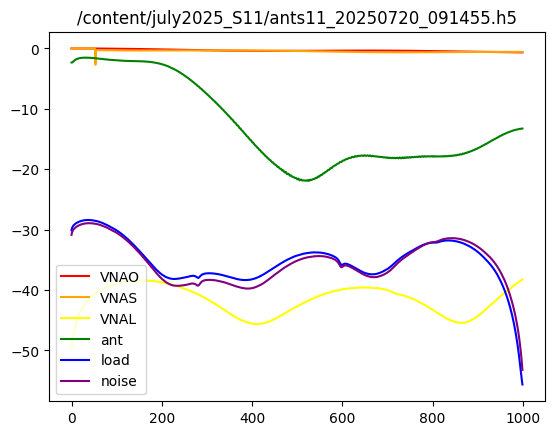

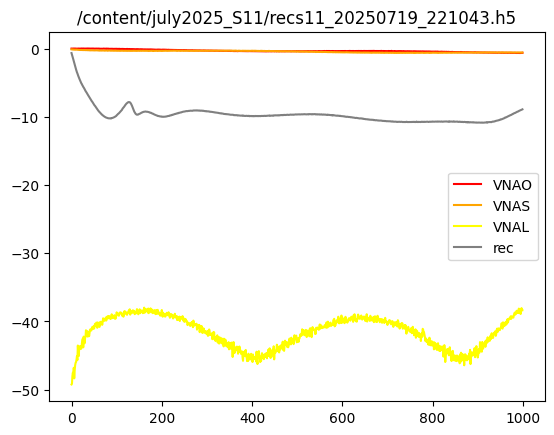

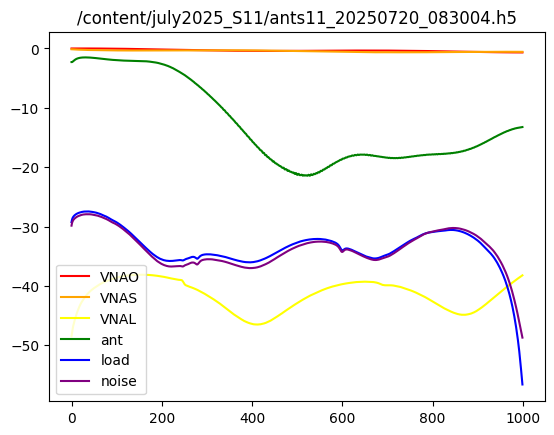

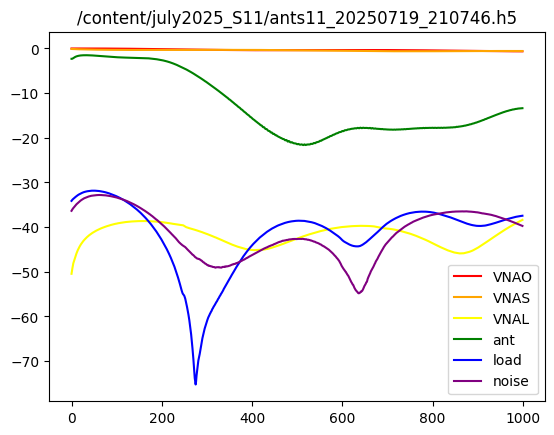

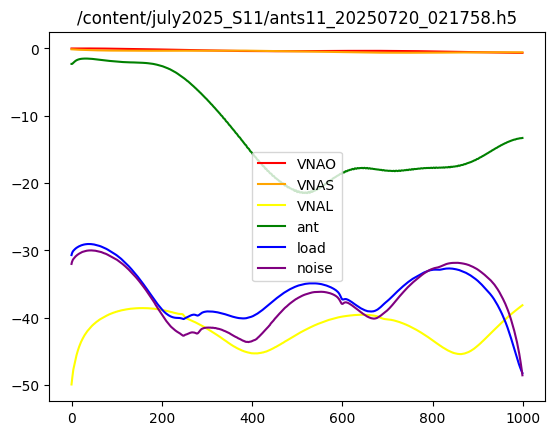

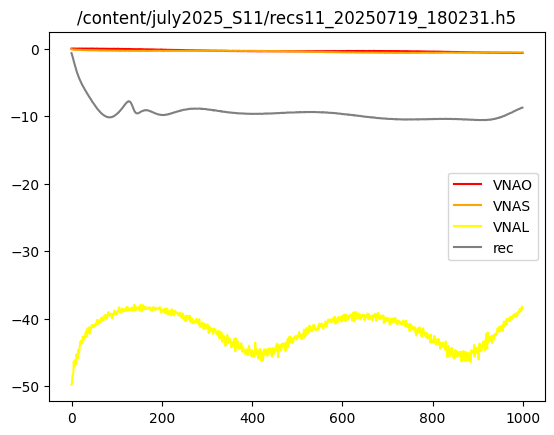

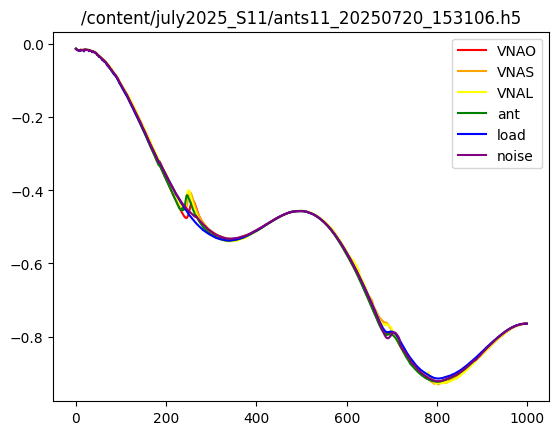

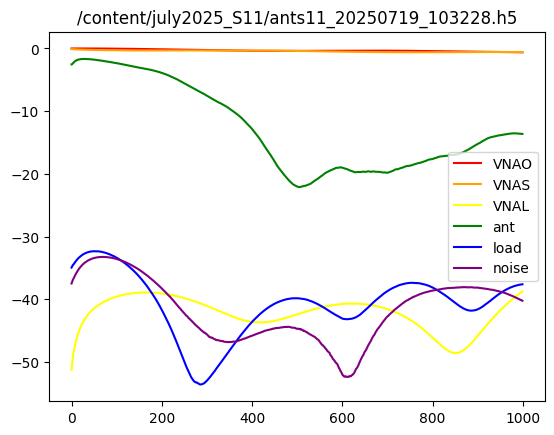

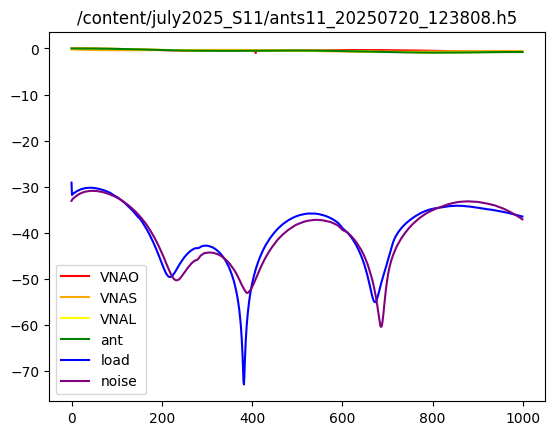

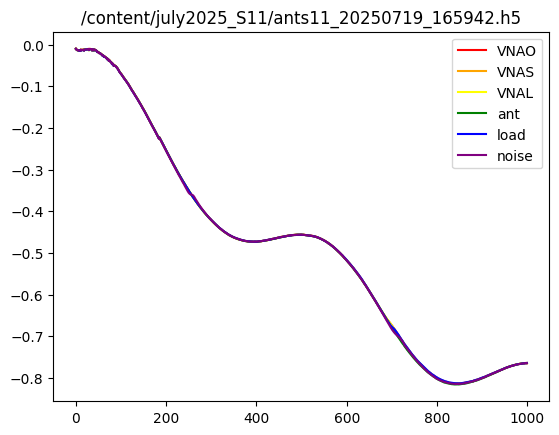

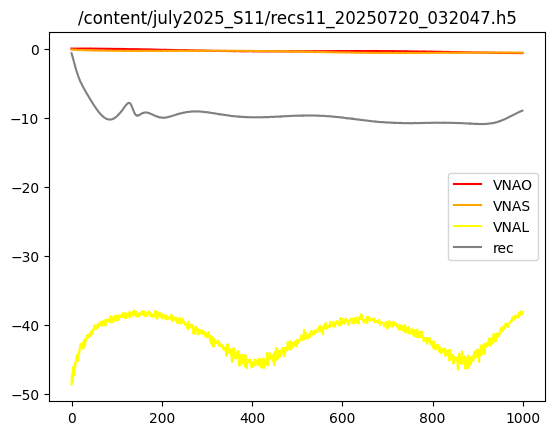

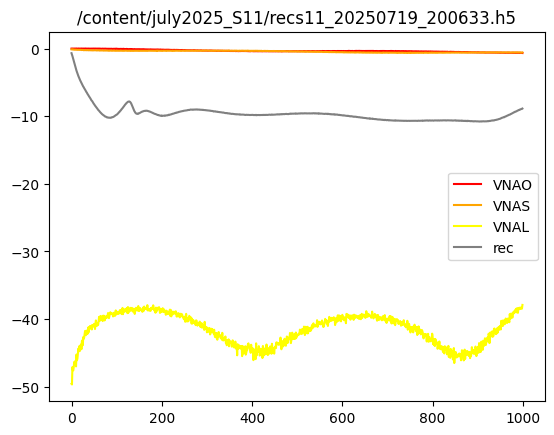

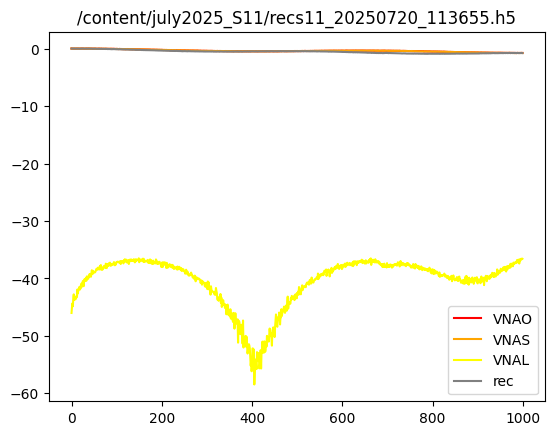

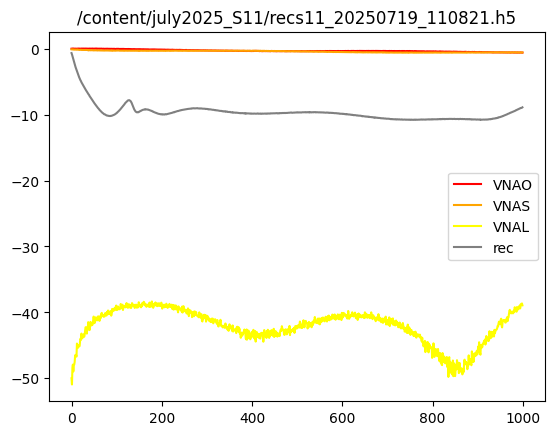

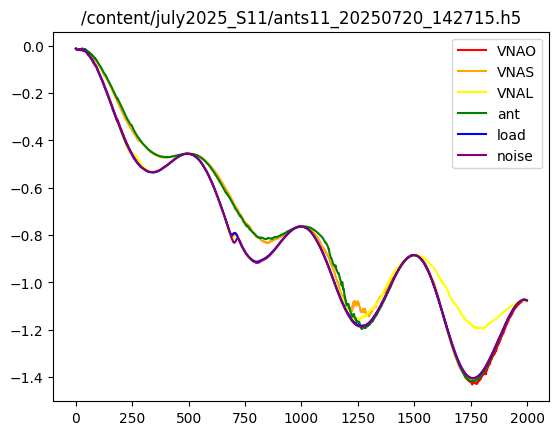

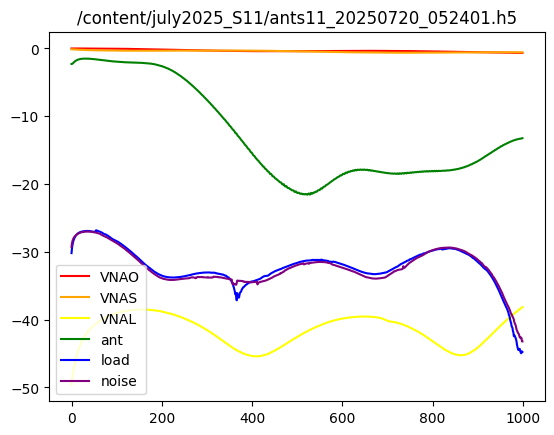

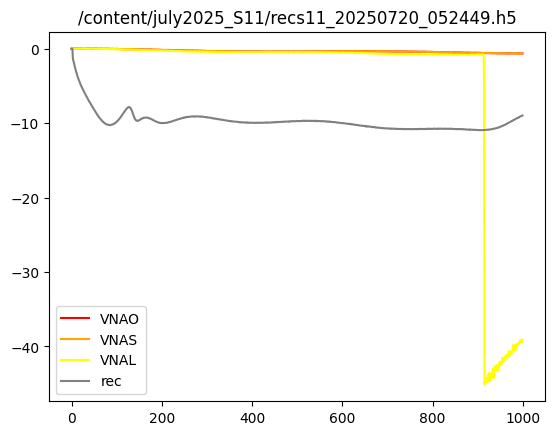

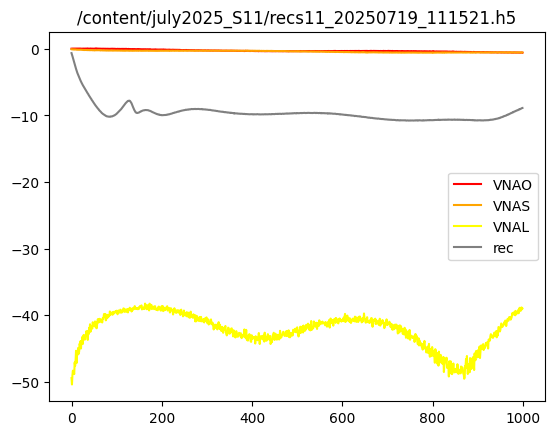

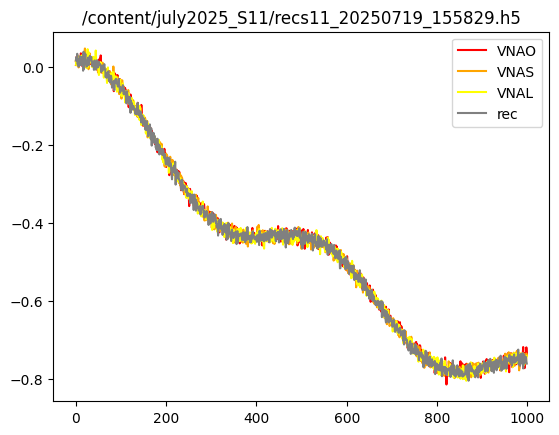

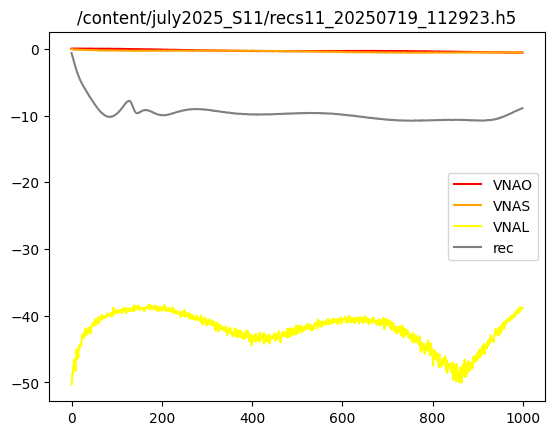

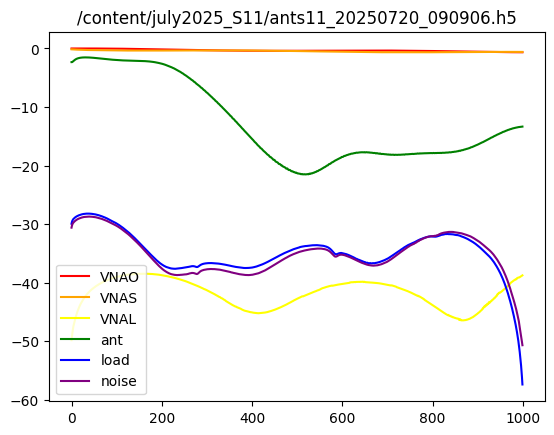

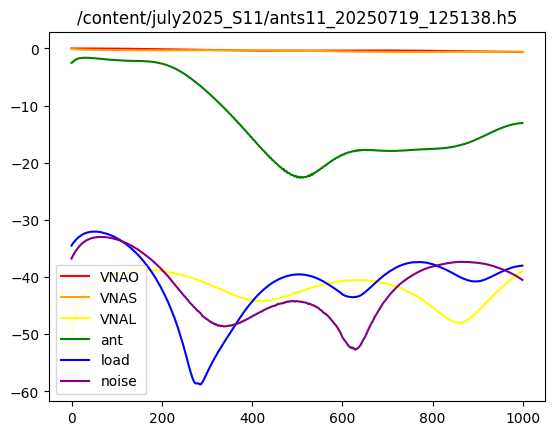

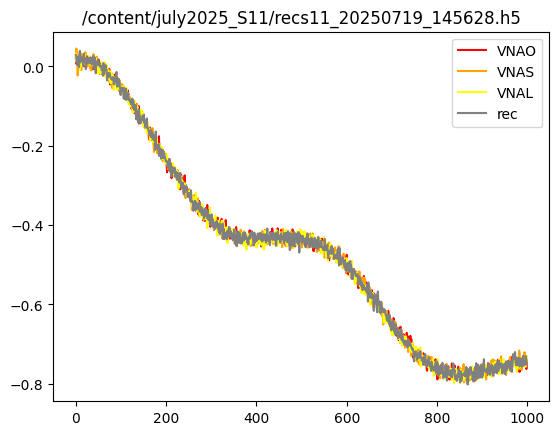

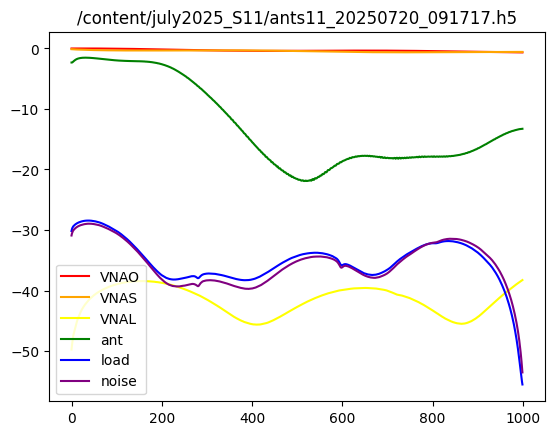

In [8]:
displayAll("/content/july2025_S11")

In [ ]:
thing = "thing"
dic = {}
print(thing[:3] == "thi")
print("/content/july2025_S11/ants11_20250719_102527.h5")
print(dic == {})

True
/content/july2025_S11/ants11_20250719_102527.h5
True
